# Surprise Housing Project 
   <font color='Orange'> <b> (Model the demand for residential property) </b> </font>
   

<ol>
    <li>Data Dictionary/Characteristics</li>
    <li>Loading Data  (✓)</li>
    <li>Data Preperation</li>
        <ol>
            <li>Converting Binary states to 0 and 1 (yes/no, day/night, good/bad etc)</li>
            <li>Creating dummy variables for string data ()</li>
    </ol>
    <li>Data Visualization</li>
     <ol>
         <li>pair plots</li>
         <li>box plots</li>
         <li>correlation heatmap</li>
    </ol>                
    <li>Splitting and Scalling data </li>
        <ol>
            <li>Splitting into Training and Testing sets</li>
            <li>Scaling data</li>
    </ol>
    <li>Building Models</li>
    <li>Residual Analysis of the train data</li>
    <li>Making Predictions using test data</li>
    <li>Model Evaluation - Before Regularization</li>
        <ol>
            <li>r^2_score</li>
            <li>scatter plat</li>
        </ol>
     <li><font color='Green'>Regularization in the context of linear regression: Ridge and Lasso</font></li>
        <ol>
            <li>Ridge regression</li>
            <li>Lasso regression</li>
        </ol>
     <li>Model Evaluation - After Regularization</li>
        <ol>
            <li>r^2_score</li>
            <li>scatter plot</li>
        </ol>

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os


### Importing and Understanding data 

In [2]:
# read the data
shdf = pd.read_csv('train.csv')

#### shid - shape, head, info, describe

In [3]:
shdf.shape

(1460, 81)

In [4]:
shdf.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
shdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
shdf.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
shdf.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [8]:
shdf.groupby(['PoolQC']).count() 

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
PoolQC                                                                  
Ex       2           2         2            2        2       2      0   
Fa       2           2         2            2        2       2      0   
Gd       3           3         3            2        3       3      0   

        LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  Fence  \
PoolQC                                    ...                                 
Ex             2            2          2  ...            2         2      2   
Fa             2            2          2  ...            2         2      2   
Gd             3            3          3  ...            3         3      2   

        MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
PoolQC                                                                  
Ex                0        2       2       2         2              2   
Fa                1        2       2       2         2              2   
Gd                0        3       3       3         3              3   

        SalePrice  
PoolQC             
Ex              2  
Fa              2  
Gd              3  

[3 rows x 80 columns]

In [9]:
shdf.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [10]:
shdf.groupby(['FireplaceQu']).count()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
FireplaceQu                                                                   
Ex            24          24        24           21       24      24      0   
Fa            33          33        33           24       33      33      1   
Gd           380         380       380          324      380     380     19   
Po            20          20        20           15       20      20      1   
TA           313         313       313          217      313     313      6   

             LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
FireplaceQu                                    ...                            
Ex                 24           24         24  ...        24       1      2   
Fa                 33           33         33  ...        33       1     12   
Gd                380          380        380  ...       380       2     50   
Po                 20           20         20  ...        20       1     10   
TA                313          313        313  ...       313       2     56   

             MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
FireplaceQu                                                                  
Ex                     0       24      24      24        24             24   
Fa                     0       33      33      33        33             33   
Gd                     5      380     380     380       380            380   
Po                     2       20      20      20        20             20   
TA                    18      313     313     313       313            313   

             SalePrice  
FireplaceQu             
Ex                  24  
Fa                  33  
Gd                 380  
Po                  20  
TA                 313  

[5 rows x 80 columns]

In [11]:
# Fields which are mostly Null values 
sfNullFields = ['Alley','PoolQC','MiscFeature','LotFrontage','MasVnrArea','GarageYrBlt']

In [12]:
# Dropping null fields
shdf=shdf.drop(sfNullFields, axis=1)

In [13]:
shdf_cols = shdf.columns
shdf_cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

## Data Visualization 

### Data visualization - continuous variables

In [14]:
# subset all categorical variables
shdf_continuous_columns = shdf.select_dtypes(exclude=['object']).columns
shdf_continuous_columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

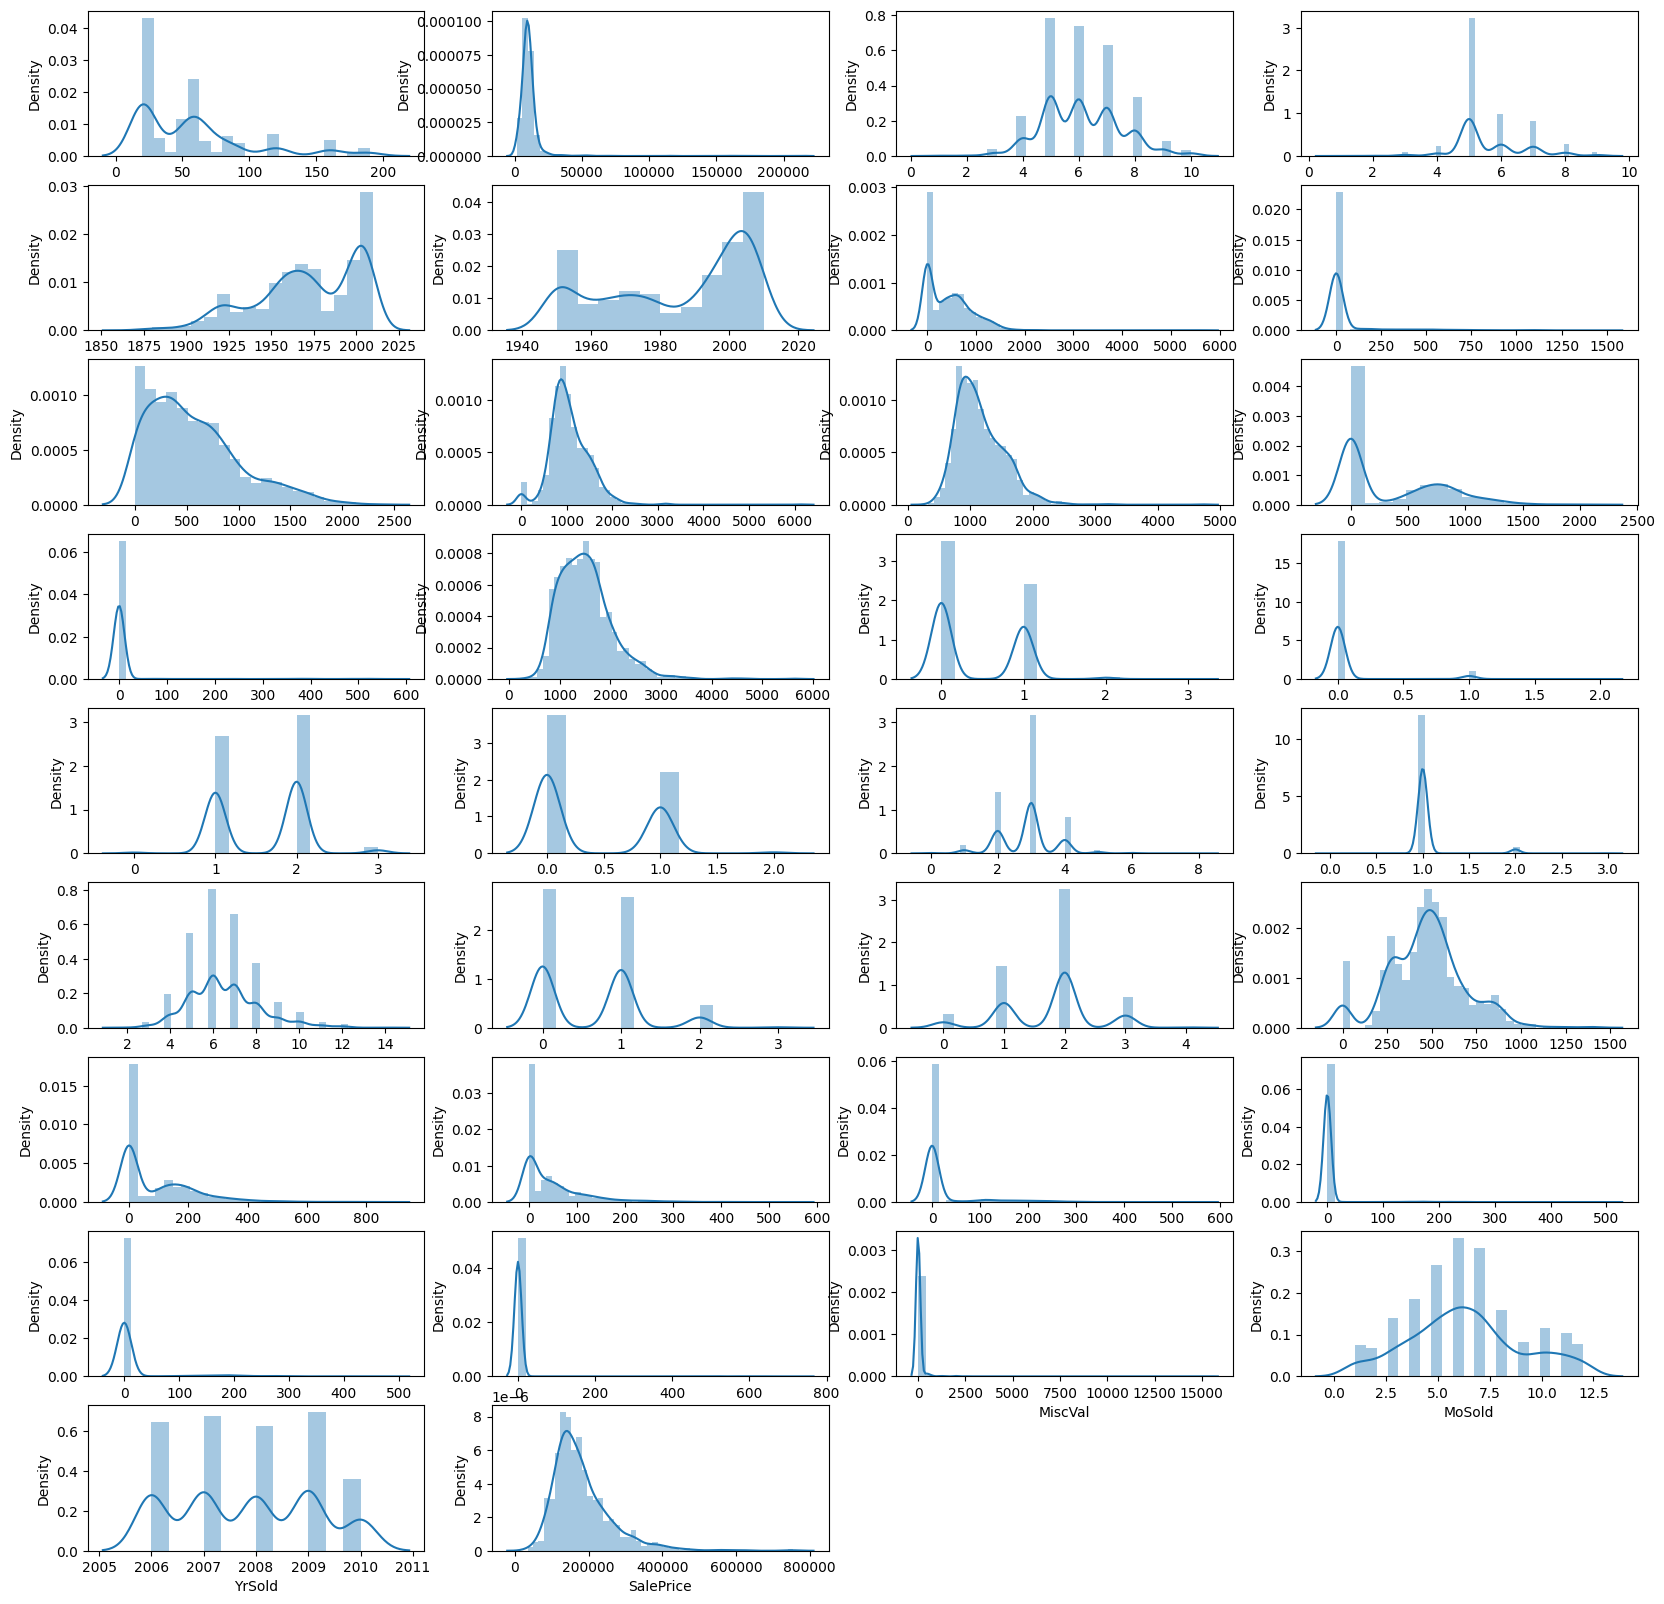

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(9,4,1)
sns.distplot(shdf['MSSubClass'])
plt.subplot(9,4,2)
sns.distplot(shdf['LotArea'])
plt.subplot(9,4,3)
sns.distplot(shdf['OverallQual'])
plt.subplot(9,4,4)
sns.distplot(shdf['OverallCond'])
plt.subplot(9,4,5)
sns.distplot(shdf['YearBuilt'])
plt.subplot(9,4,6)
sns.distplot(shdf['YearRemodAdd'])
plt.subplot(9,4,7)
sns.distplot(shdf['BsmtFinSF1'])
plt.subplot(9,4,8)
sns.distplot(shdf['BsmtFinSF2'])

plt.subplot(9,4,9)
sns.distplot(shdf['BsmtUnfSF'])
plt.subplot(9,4,10)
sns.distplot(shdf['TotalBsmtSF'])
plt.subplot(9,4,11)
sns.distplot(shdf['1stFlrSF'])
plt.subplot(9,4,12)
sns.distplot(shdf['2ndFlrSF'])
plt.subplot(9,4,13)
sns.distplot(shdf['LowQualFinSF'])
plt.subplot(9,4,14)
sns.distplot(shdf['GrLivArea'])
plt.subplot(9,4,15)
sns.distplot(shdf['BsmtFullBath'])
plt.subplot(9,4,16)
sns.distplot(shdf['BsmtHalfBath'])

plt.subplot(9,4,17)
sns.distplot(shdf['FullBath'])
plt.subplot(9,4,18)
sns.distplot(shdf['HalfBath'])
plt.subplot(9,4,19)
sns.distplot(shdf['BedroomAbvGr'])
plt.subplot(9,4,20)
sns.distplot(shdf['KitchenAbvGr'])
plt.subplot(9,4,21)
sns.distplot(shdf['TotRmsAbvGrd'])
plt.subplot(9,4,22)
sns.distplot(shdf['Fireplaces'])
plt.subplot(9,4,23)
sns.distplot(shdf['GarageCars'])
plt.subplot(9,4,24)
sns.distplot(shdf['GarageArea'])

plt.subplot(9,4,25)
sns.distplot(shdf['WoodDeckSF'])
plt.subplot(9,4,26)
sns.distplot(shdf['OpenPorchSF'])
plt.subplot(9,4,27)
sns.distplot(shdf['EnclosedPorch'])
plt.subplot(9,4,28)
sns.distplot(shdf['3SsnPorch'])
plt.subplot(9,4,29)
sns.distplot(shdf['ScreenPorch'])
plt.subplot(9,4,30)
sns.distplot(shdf['PoolArea'])
plt.subplot(9,4,31)
sns.distplot(shdf['MiscVal'])
plt.subplot(9,4,32)
sns.distplot(shdf['MoSold'])

plt.subplot(9,4,33)
sns.distplot(shdf['YrSold'])
plt.subplot(9,4,34)
sns.distplot(shdf['SalePrice'])

plt.show()

In [16]:
t1=shdf[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond','YearBuilt','YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2','SalePrice']]
t2=shdf[['BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath','SalePrice']]
t3=shdf[['FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','GarageArea','SalePrice']]
t4=shdf[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']]

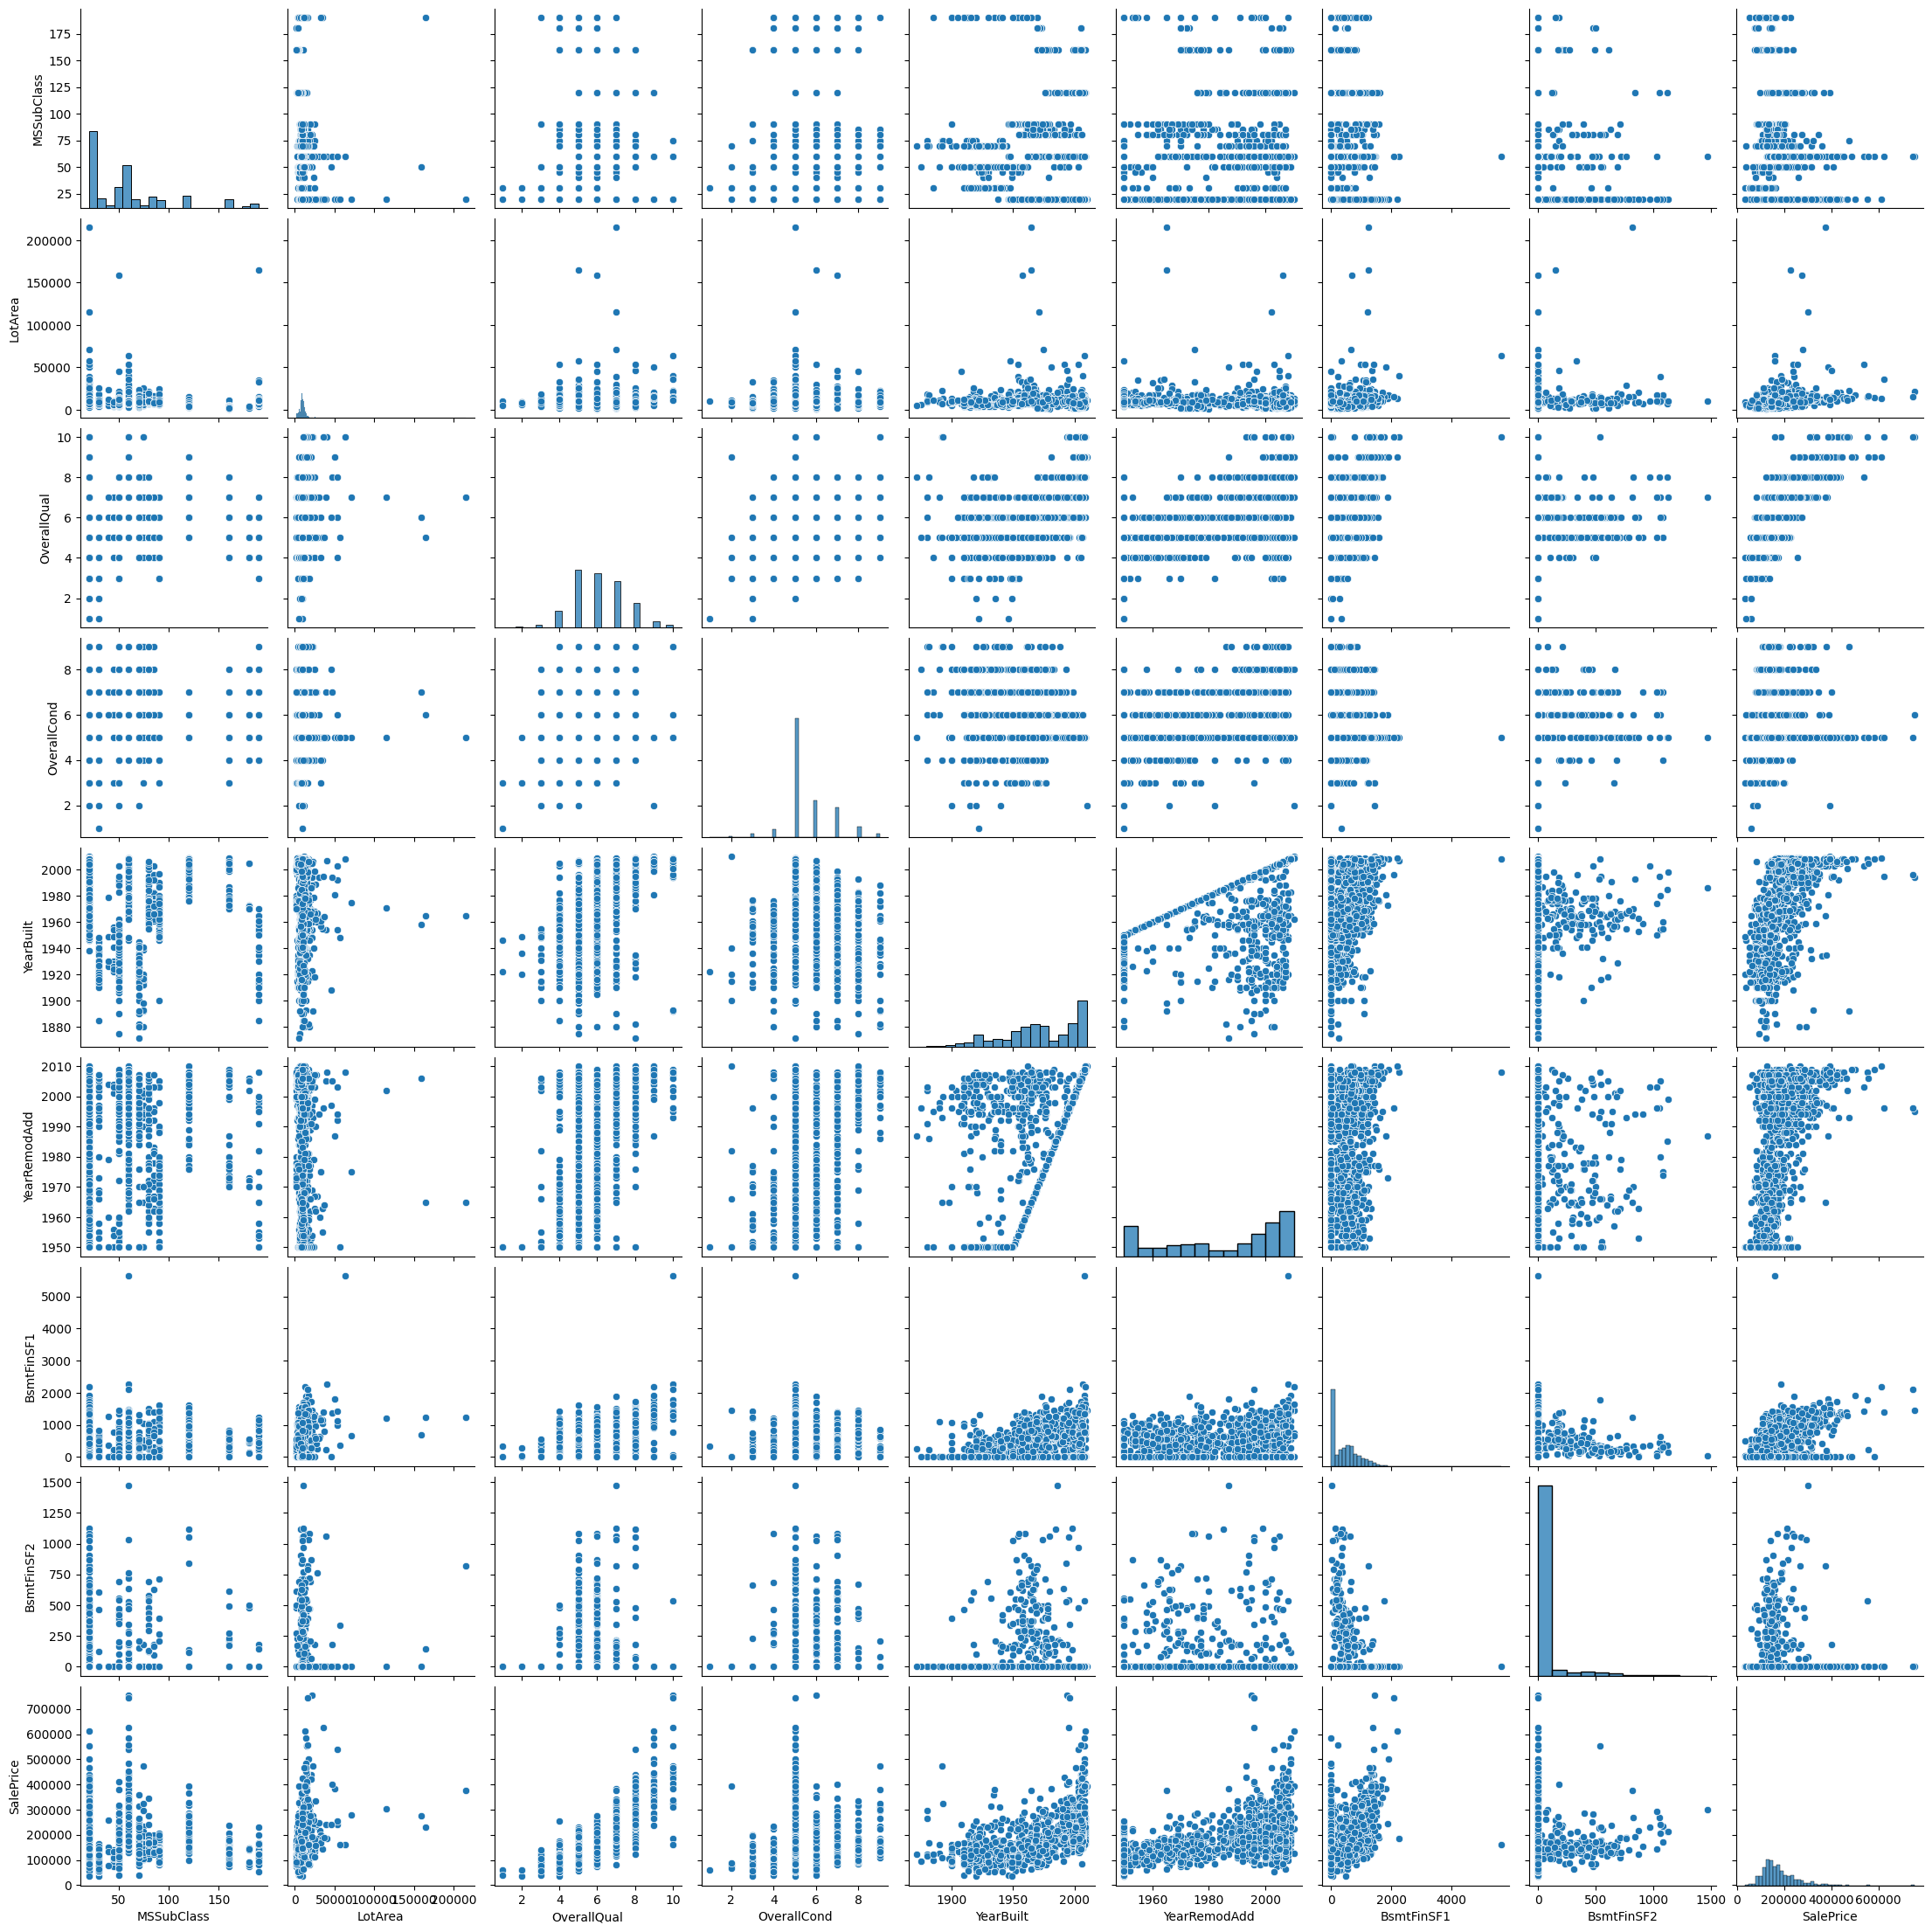

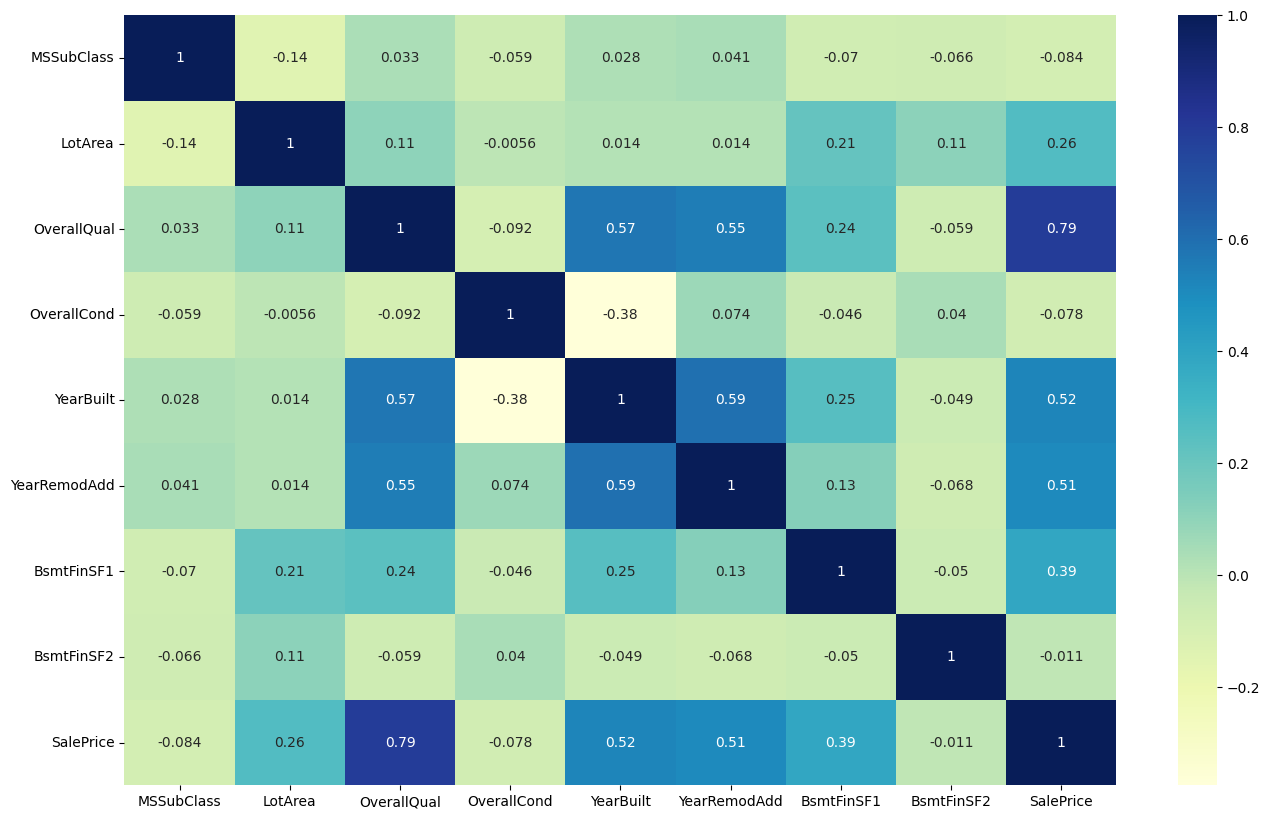

In [17]:
# # visualization of numeric variables (continuous variable)
sns.pairplot(t1)
plt.show()
# plot a headmap to see the correlation between the predictors
plt.figure(figsize = (16,10))
sns.heatmap(t1.corr(), annot = True, cmap = "YlGnBu")
plt.show()

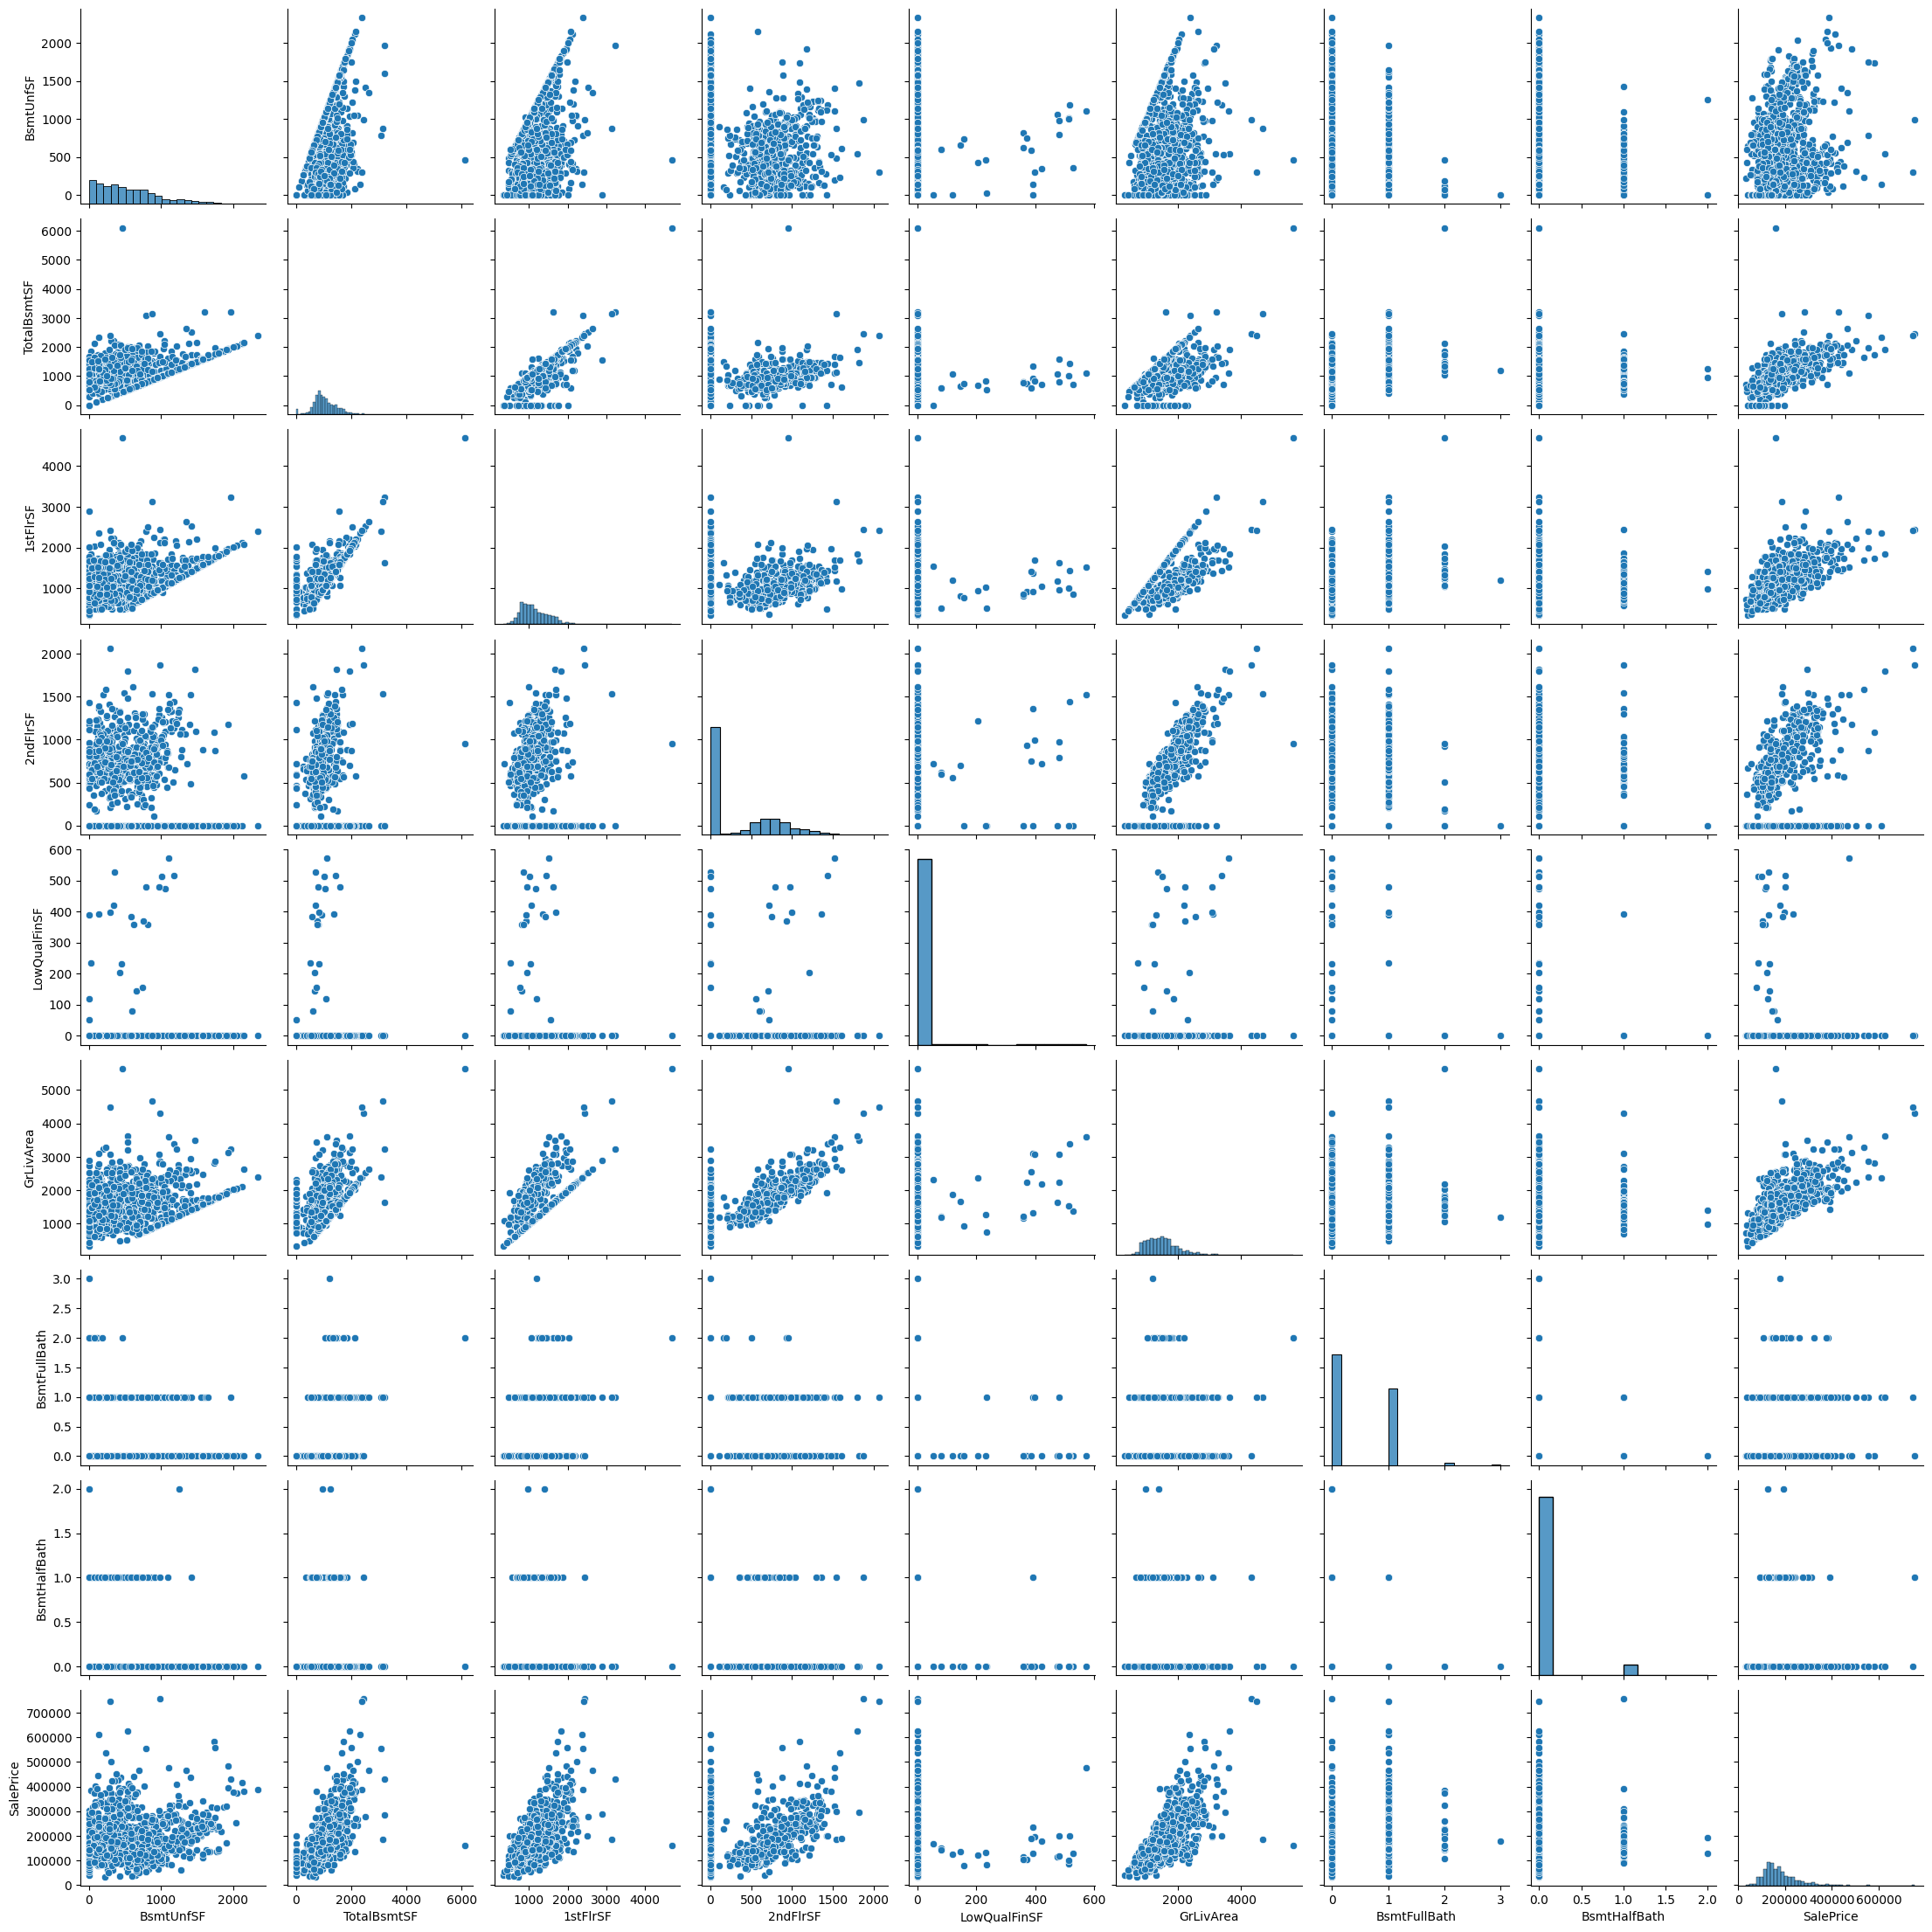

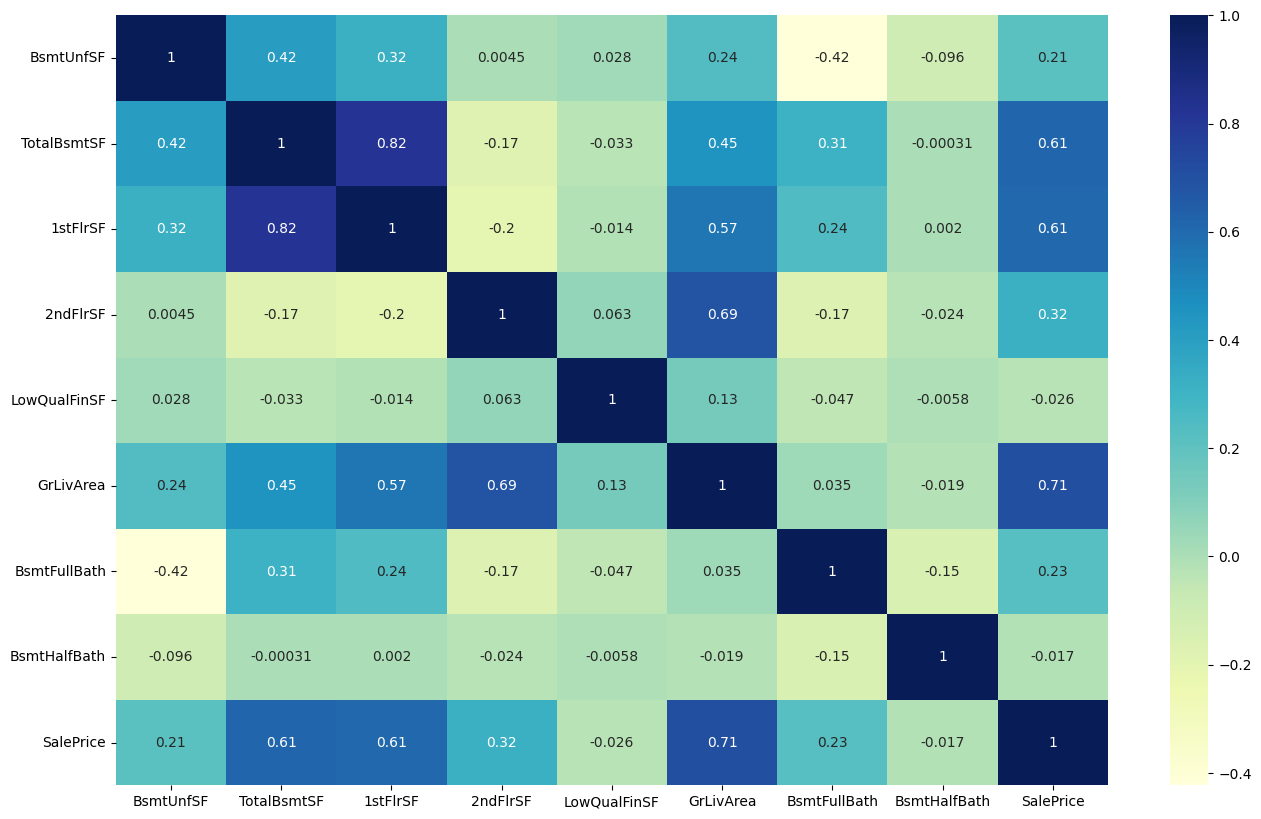

In [18]:
# # visualization of numeric variables (continuous variable)
sns.pairplot(t2)
plt.show()
# plot a headmap to see the correlation between the predictors
plt.figure(figsize = (16,10))
sns.heatmap(t2.corr(), annot = True, cmap = "YlGnBu")
plt.show()

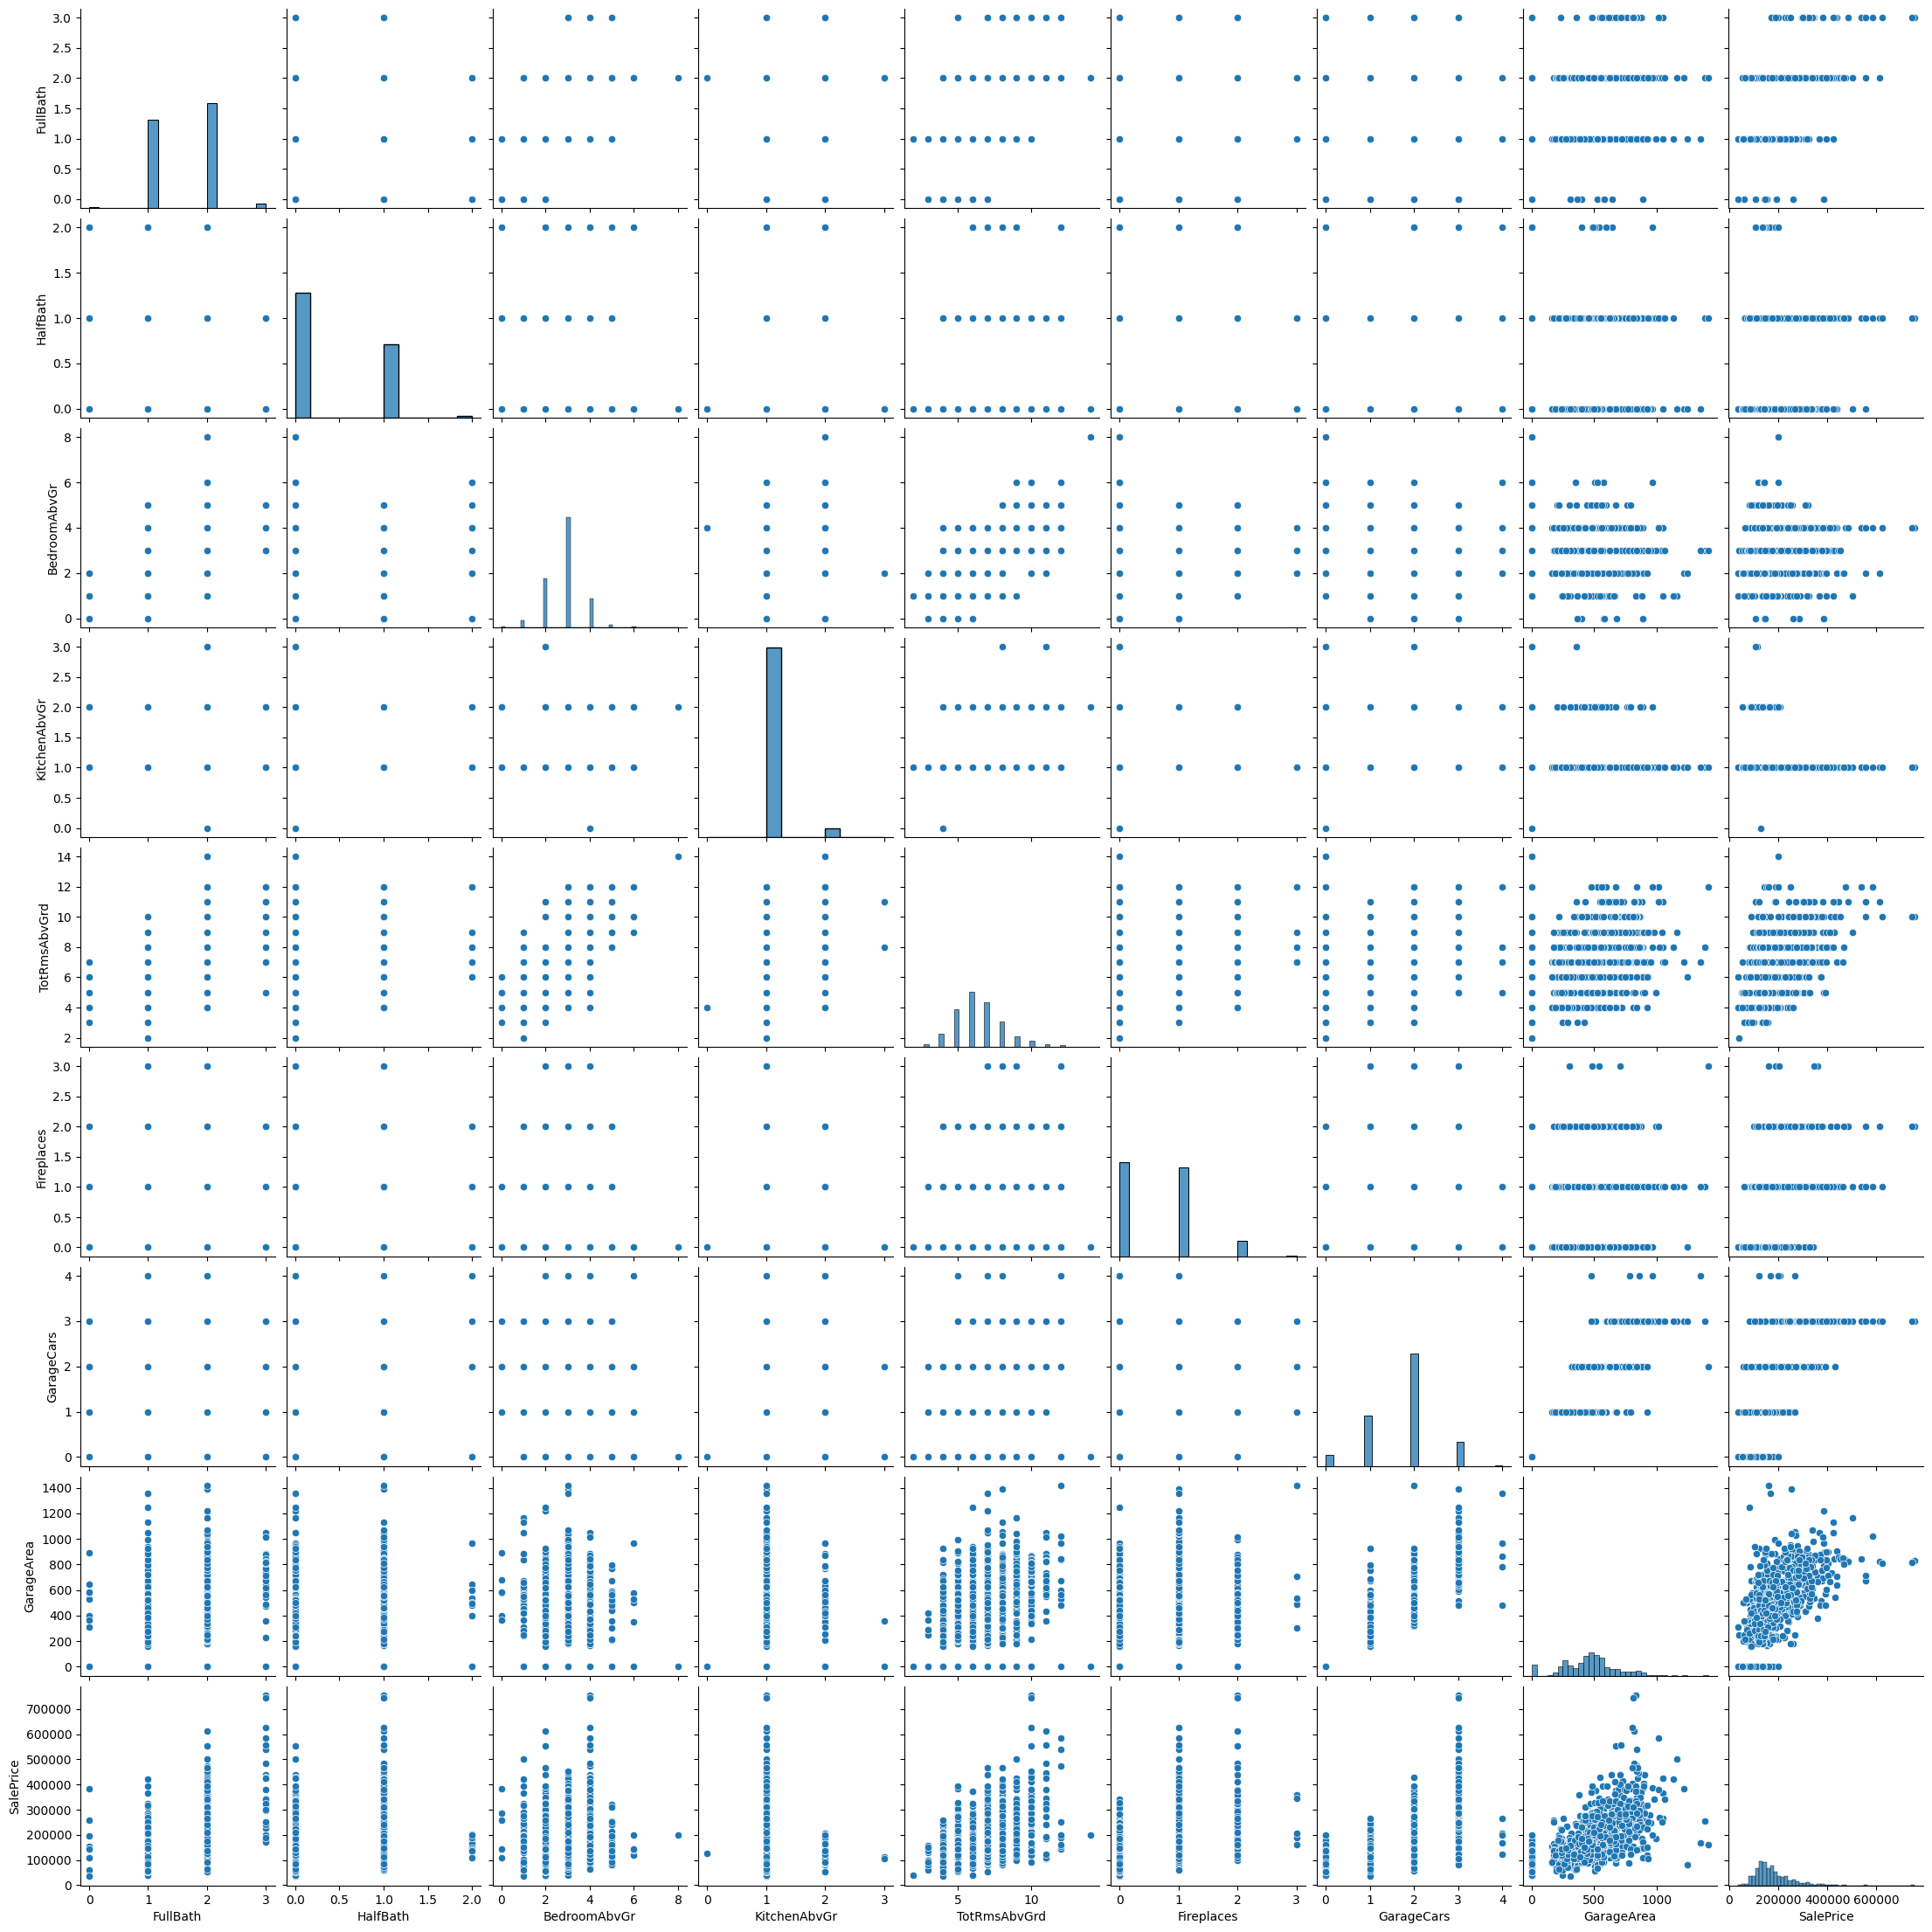

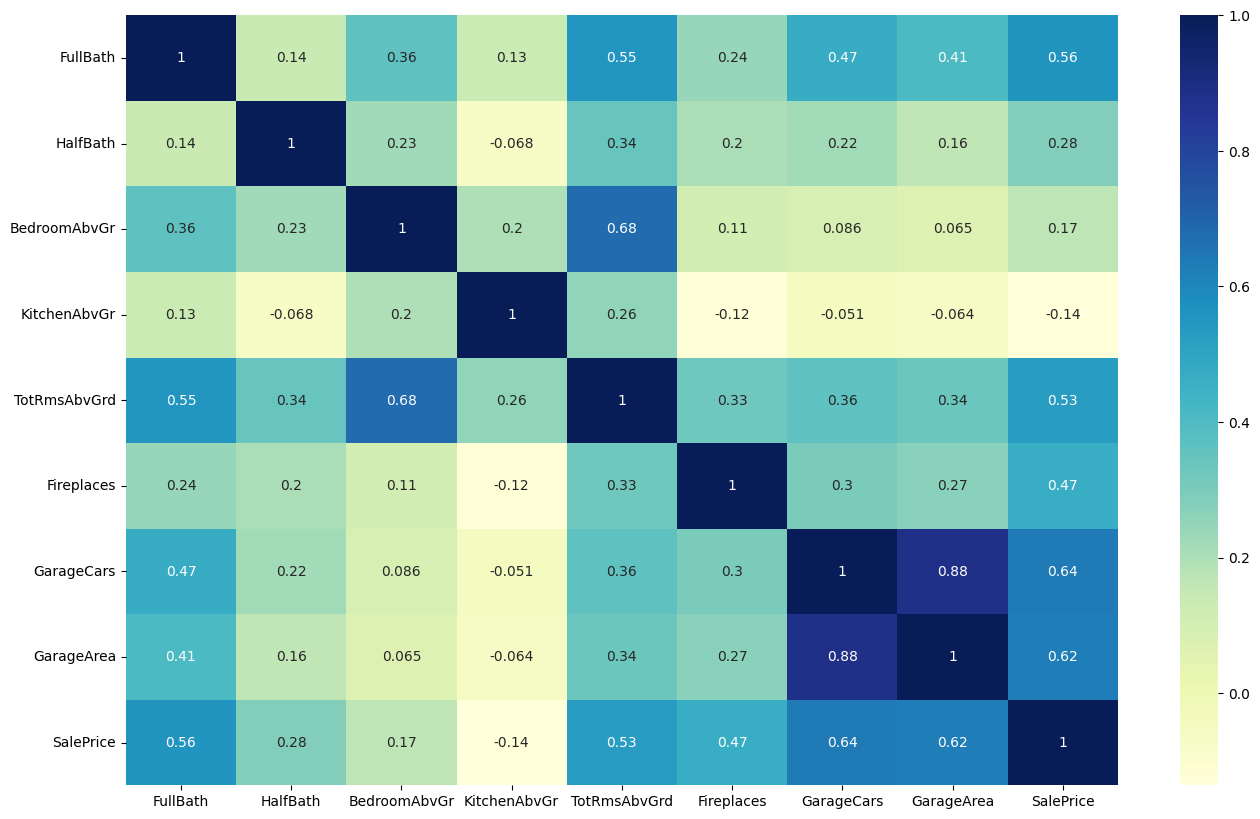

In [19]:
# # visualization of numeric variables (continuous variable)
sns.pairplot(t3)
plt.show()
# plot a headmap to see the correlation between the predictors
plt.figure(figsize = (16,10))
sns.heatmap(t3.corr(), annot = True, cmap = "YlGnBu")
plt.show()

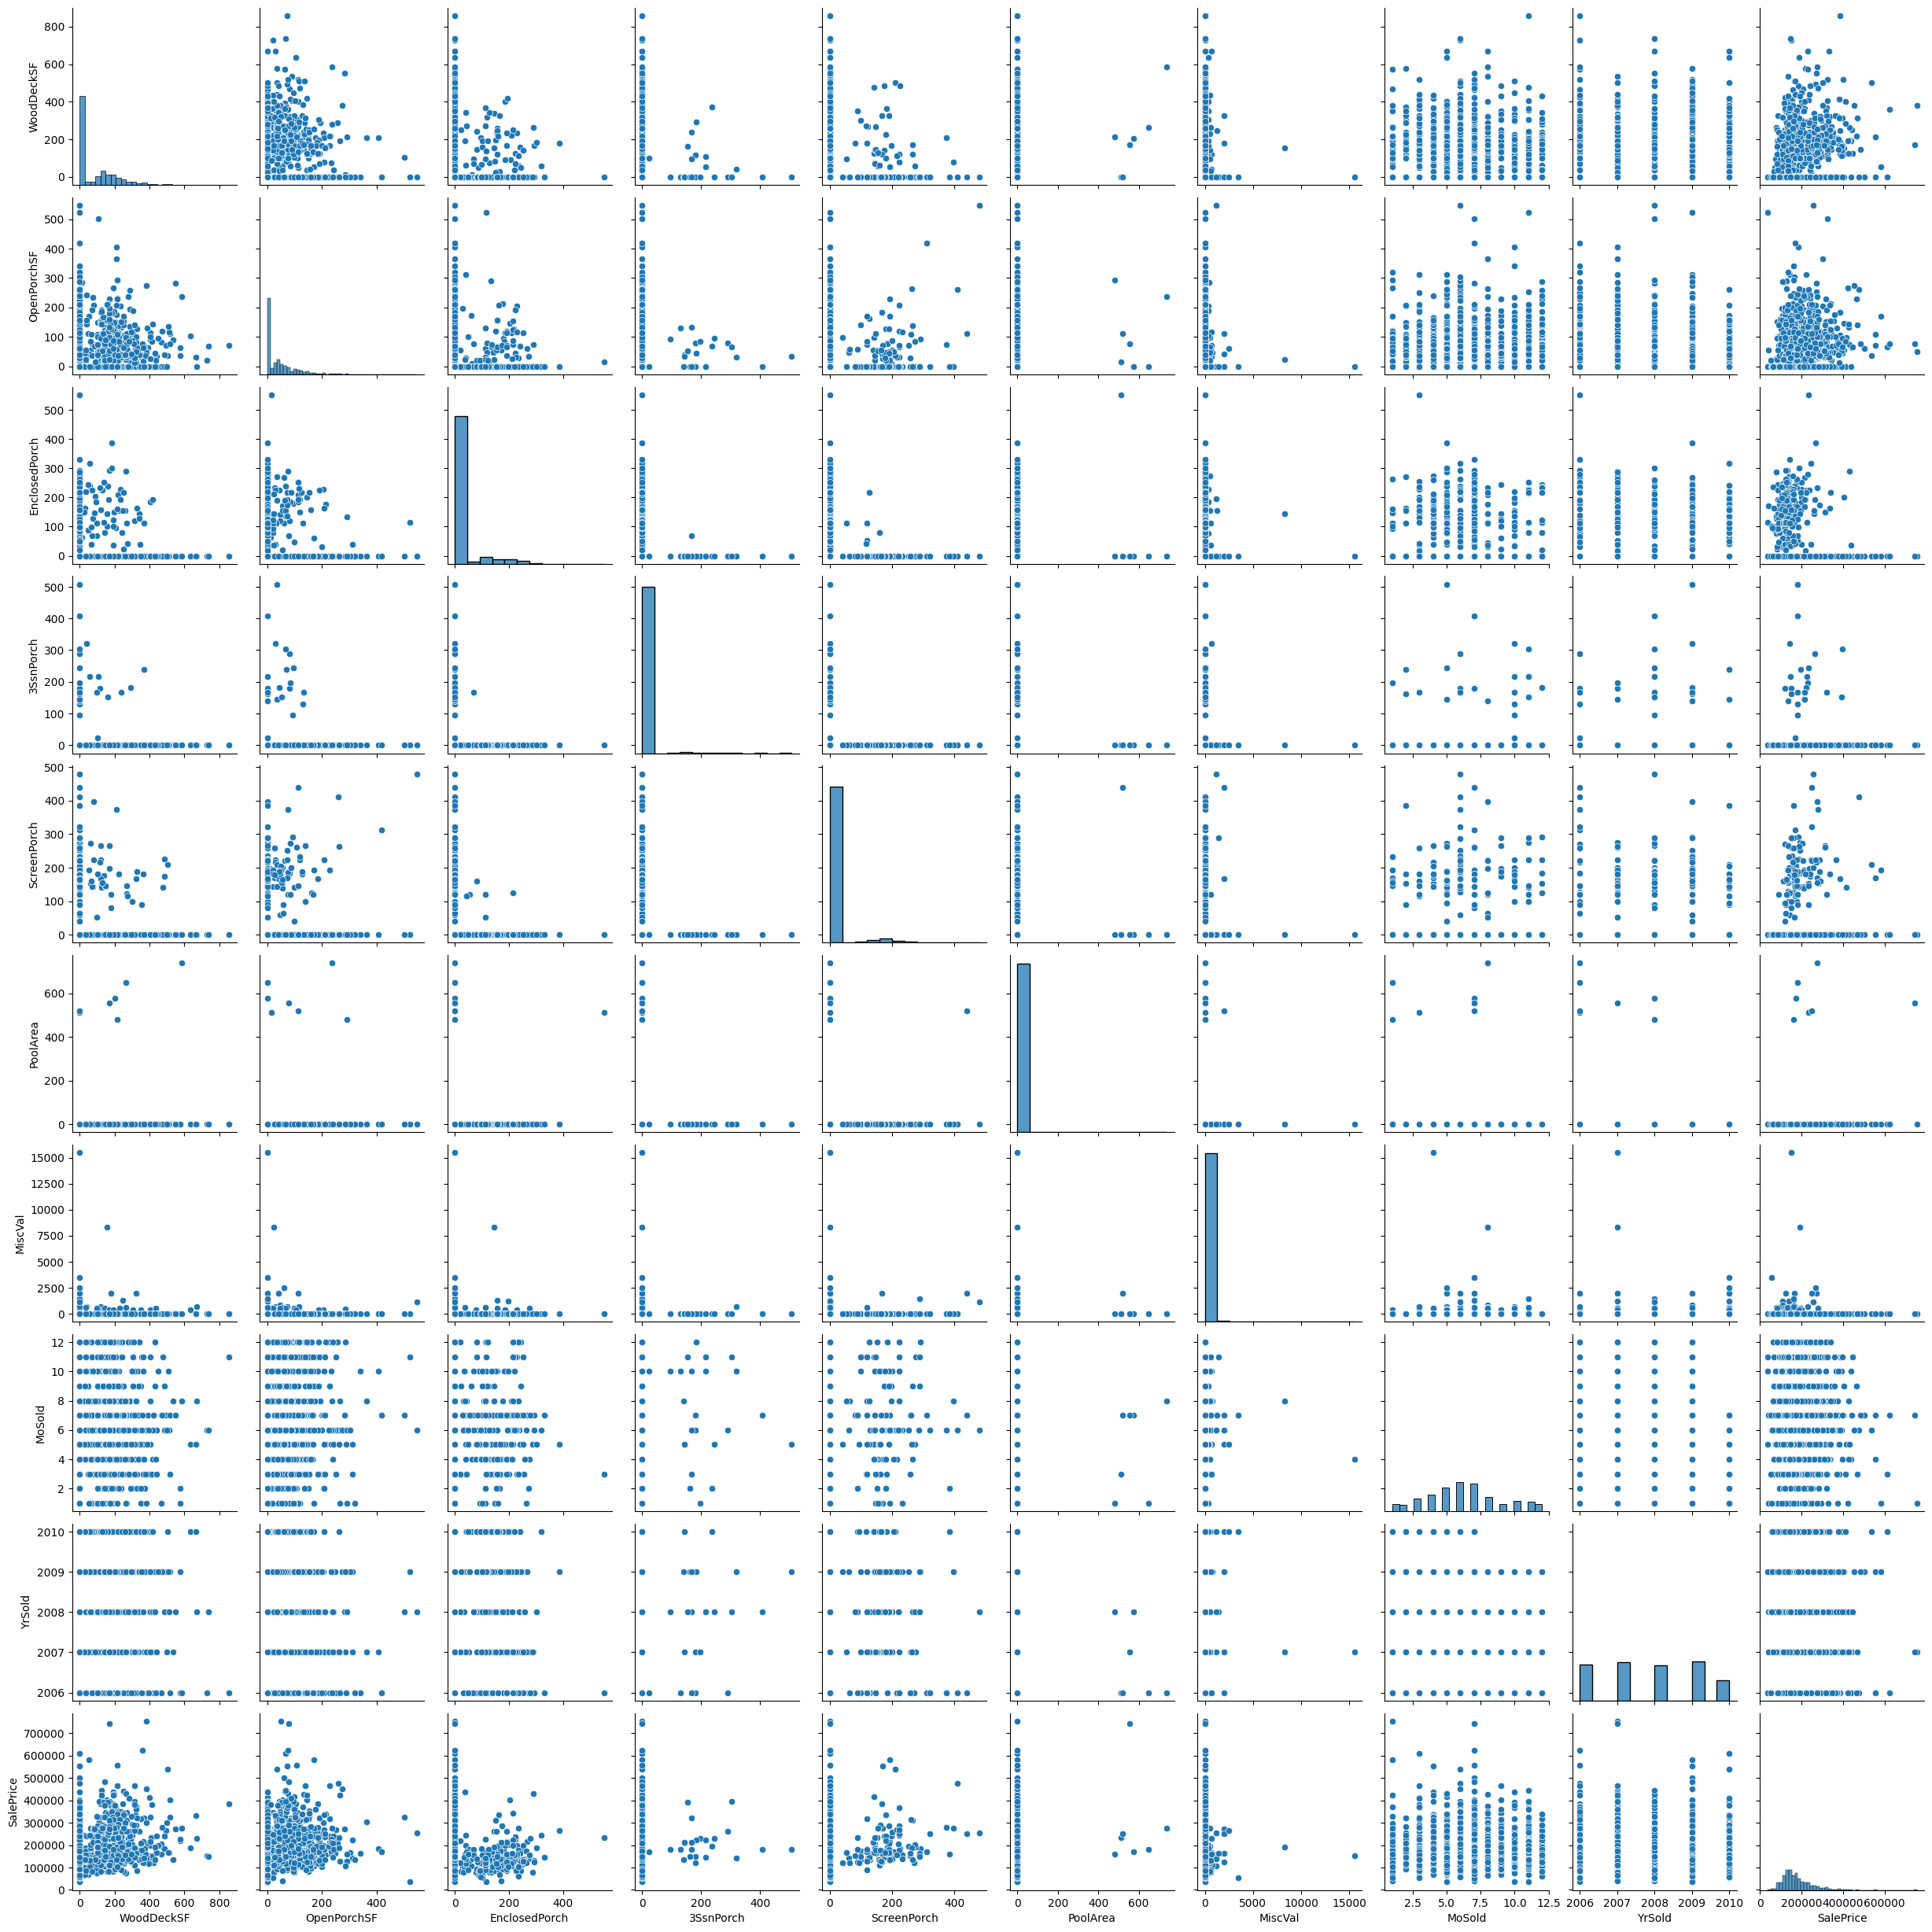

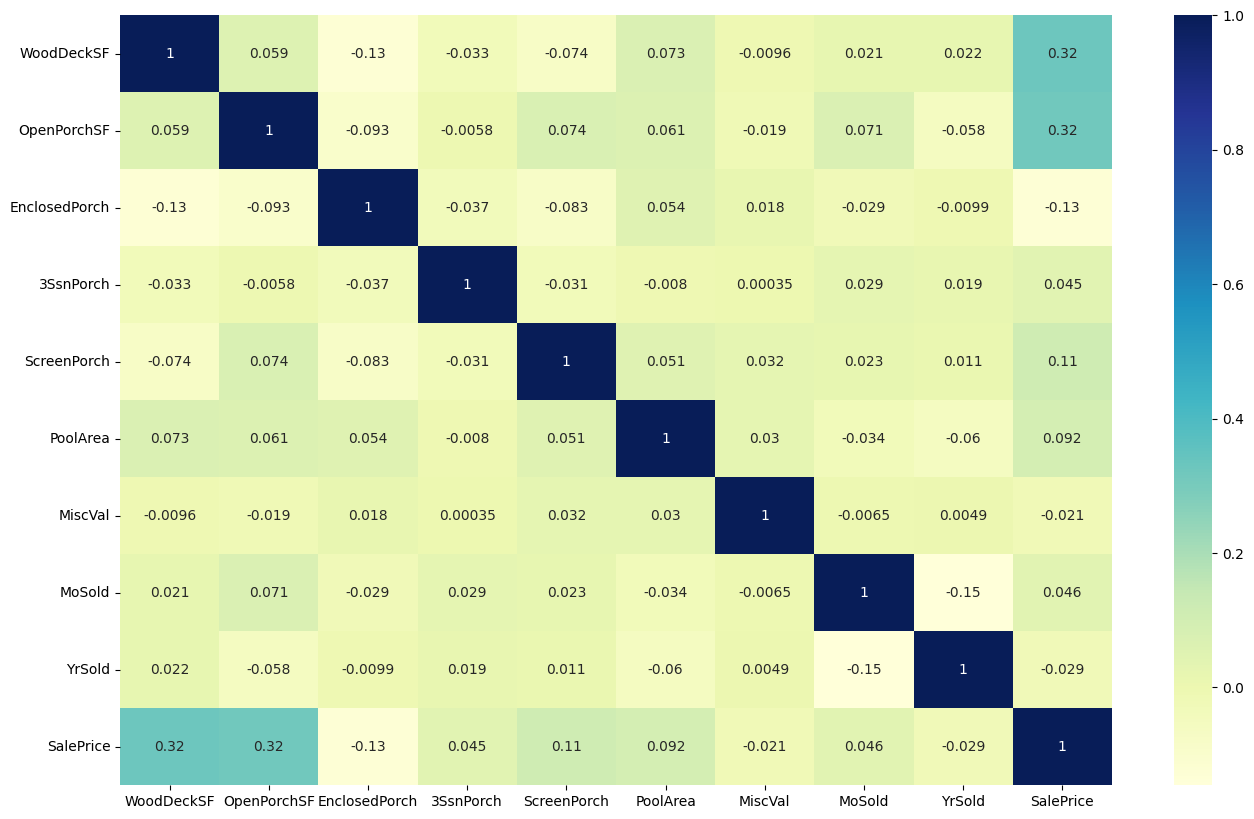

In [20]:
# # visualization of numeric variables (continuous variable)
sns.pairplot(t4)
plt.show()
# plot a headmap to see the correlation between the predictors
plt.figure(figsize = (16,10))
sns.heatmap(t4.corr(), annot = True, cmap = "YlGnBu")
plt.show()

### Data visualization - categorical variables

In [21]:
# subset all categorical variables
shdf_categorical_columns = shdf.select_dtypes(include=['object']).columns
shdf_categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

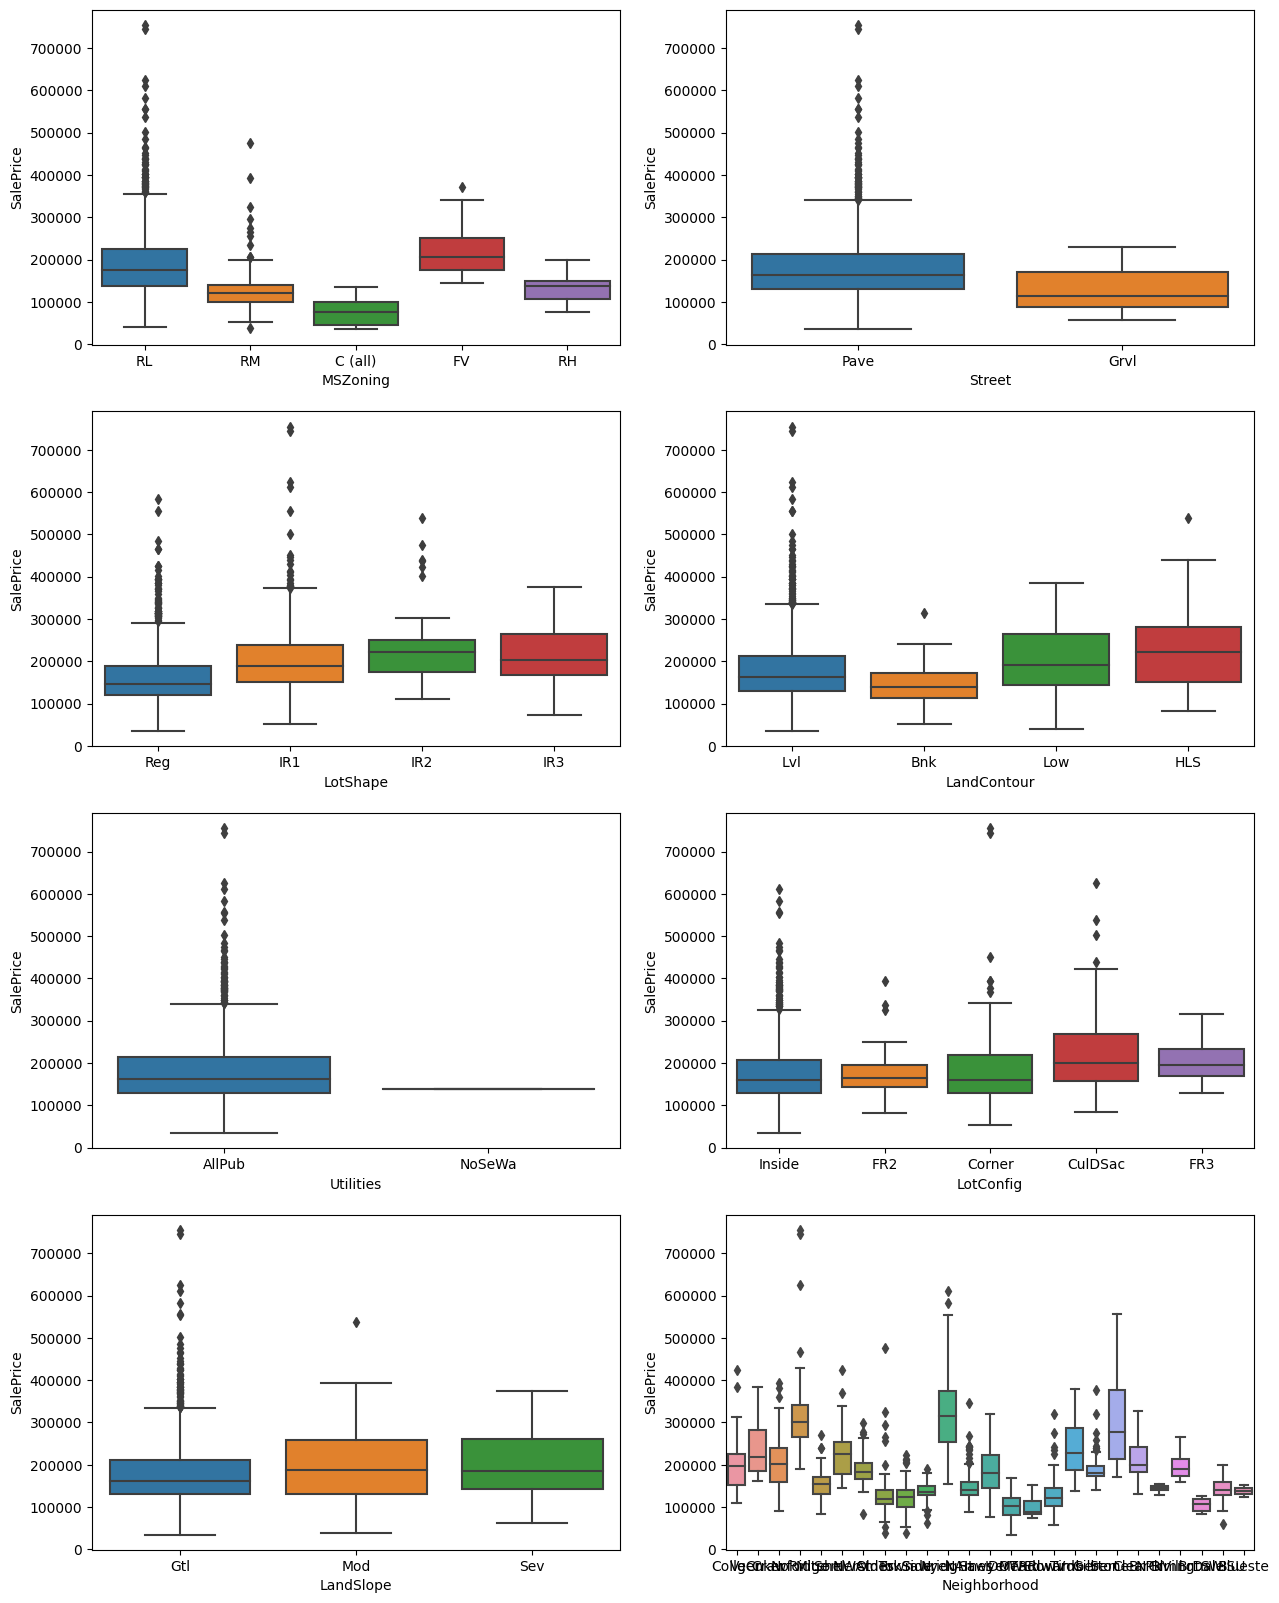

In [22]:
# visualization of categorical variables

plt.figure(figsize=(15,20 ))
plt.subplot(4,2,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = shdf)
plt.subplot(4,2,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = shdf)
plt.subplot(4,2,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = shdf)
plt.subplot(4,2,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = shdf)
plt.subplot(4,2,5)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = shdf)
plt.subplot(4,2,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = shdf)
plt.subplot(4,2,7)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = shdf)
plt.subplot(4,2,8)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = shdf)
plt.show()

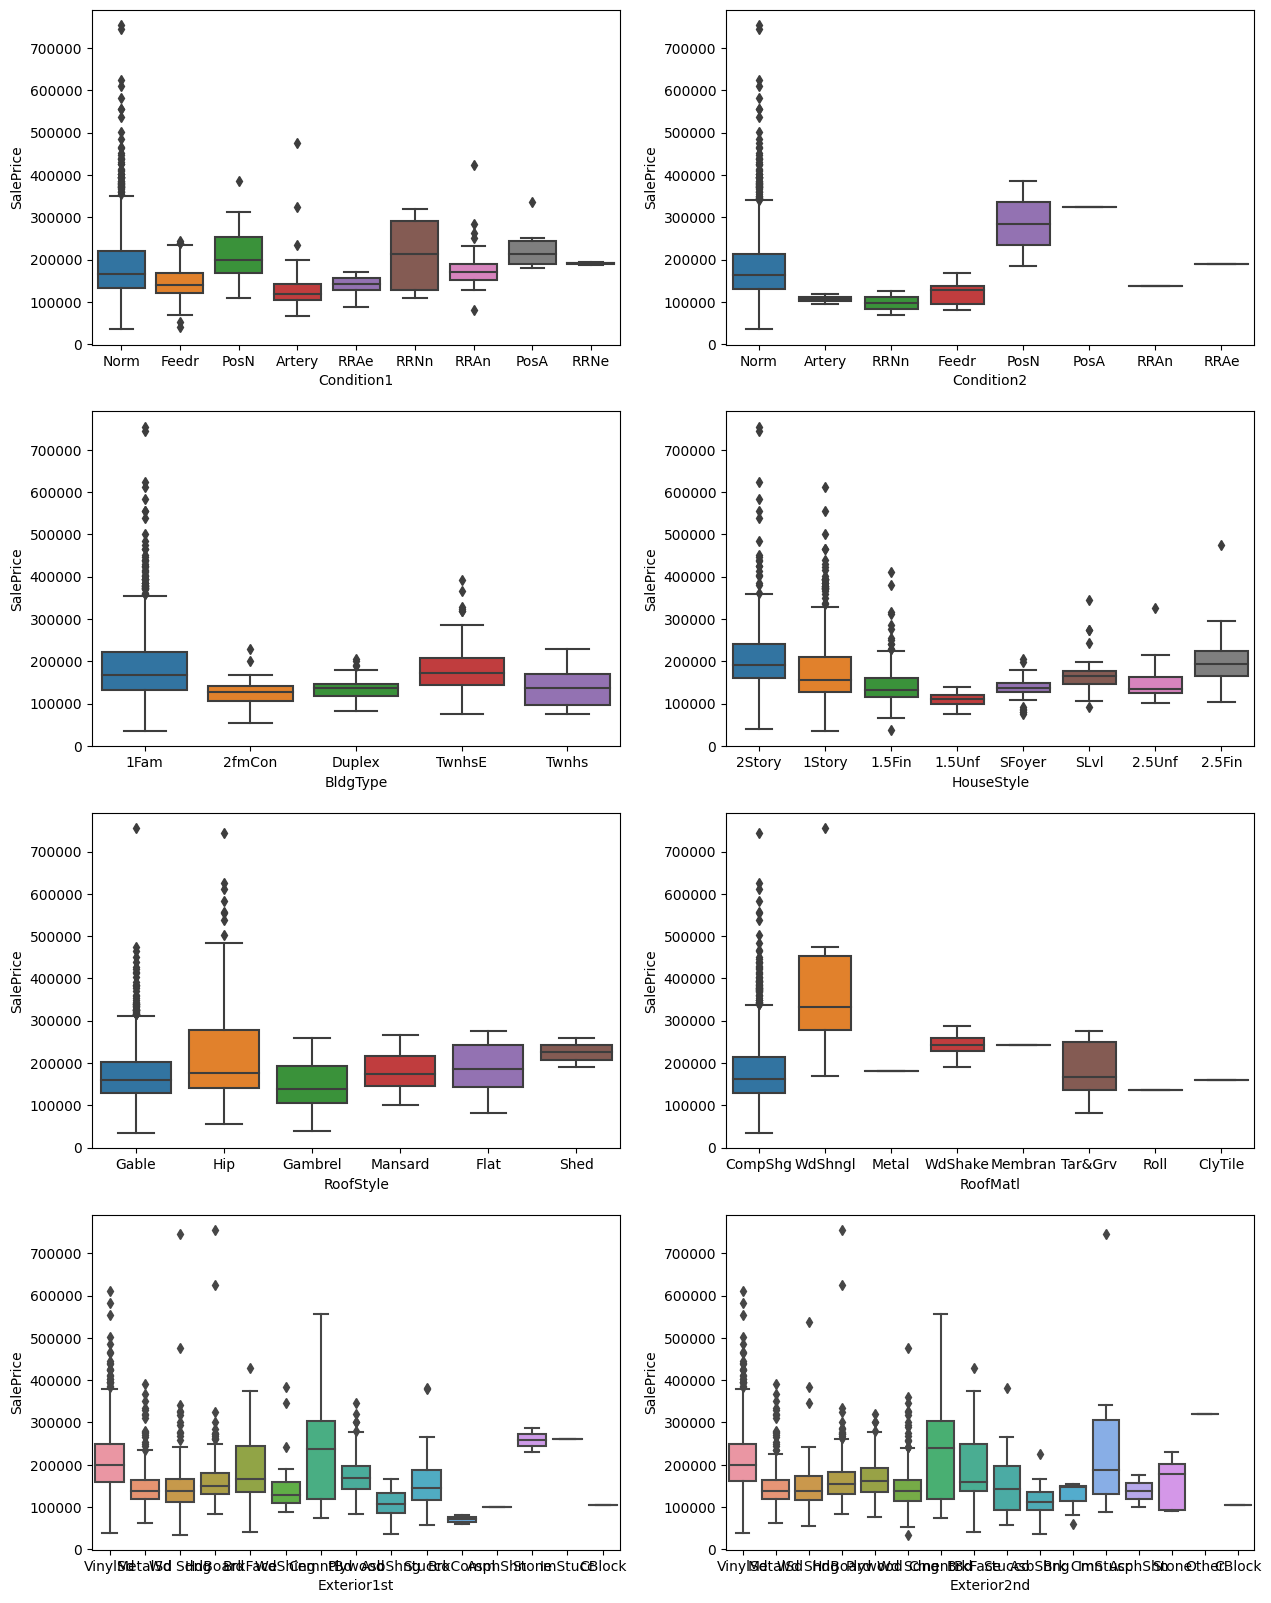

In [23]:
# visualization of categorical variables

plt.figure(figsize=(15,20 ))
plt.subplot(4,2,1)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = shdf)
plt.subplot(4,2,2)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = shdf)
plt.subplot(4,2,3)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = shdf)
plt.subplot(4,2,4)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = shdf)
plt.subplot(4,2,5)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = shdf)
plt.subplot(4,2,6)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = shdf)
plt.subplot(4,2,7)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = shdf)
plt.subplot(4,2,8)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = shdf)
plt.show()

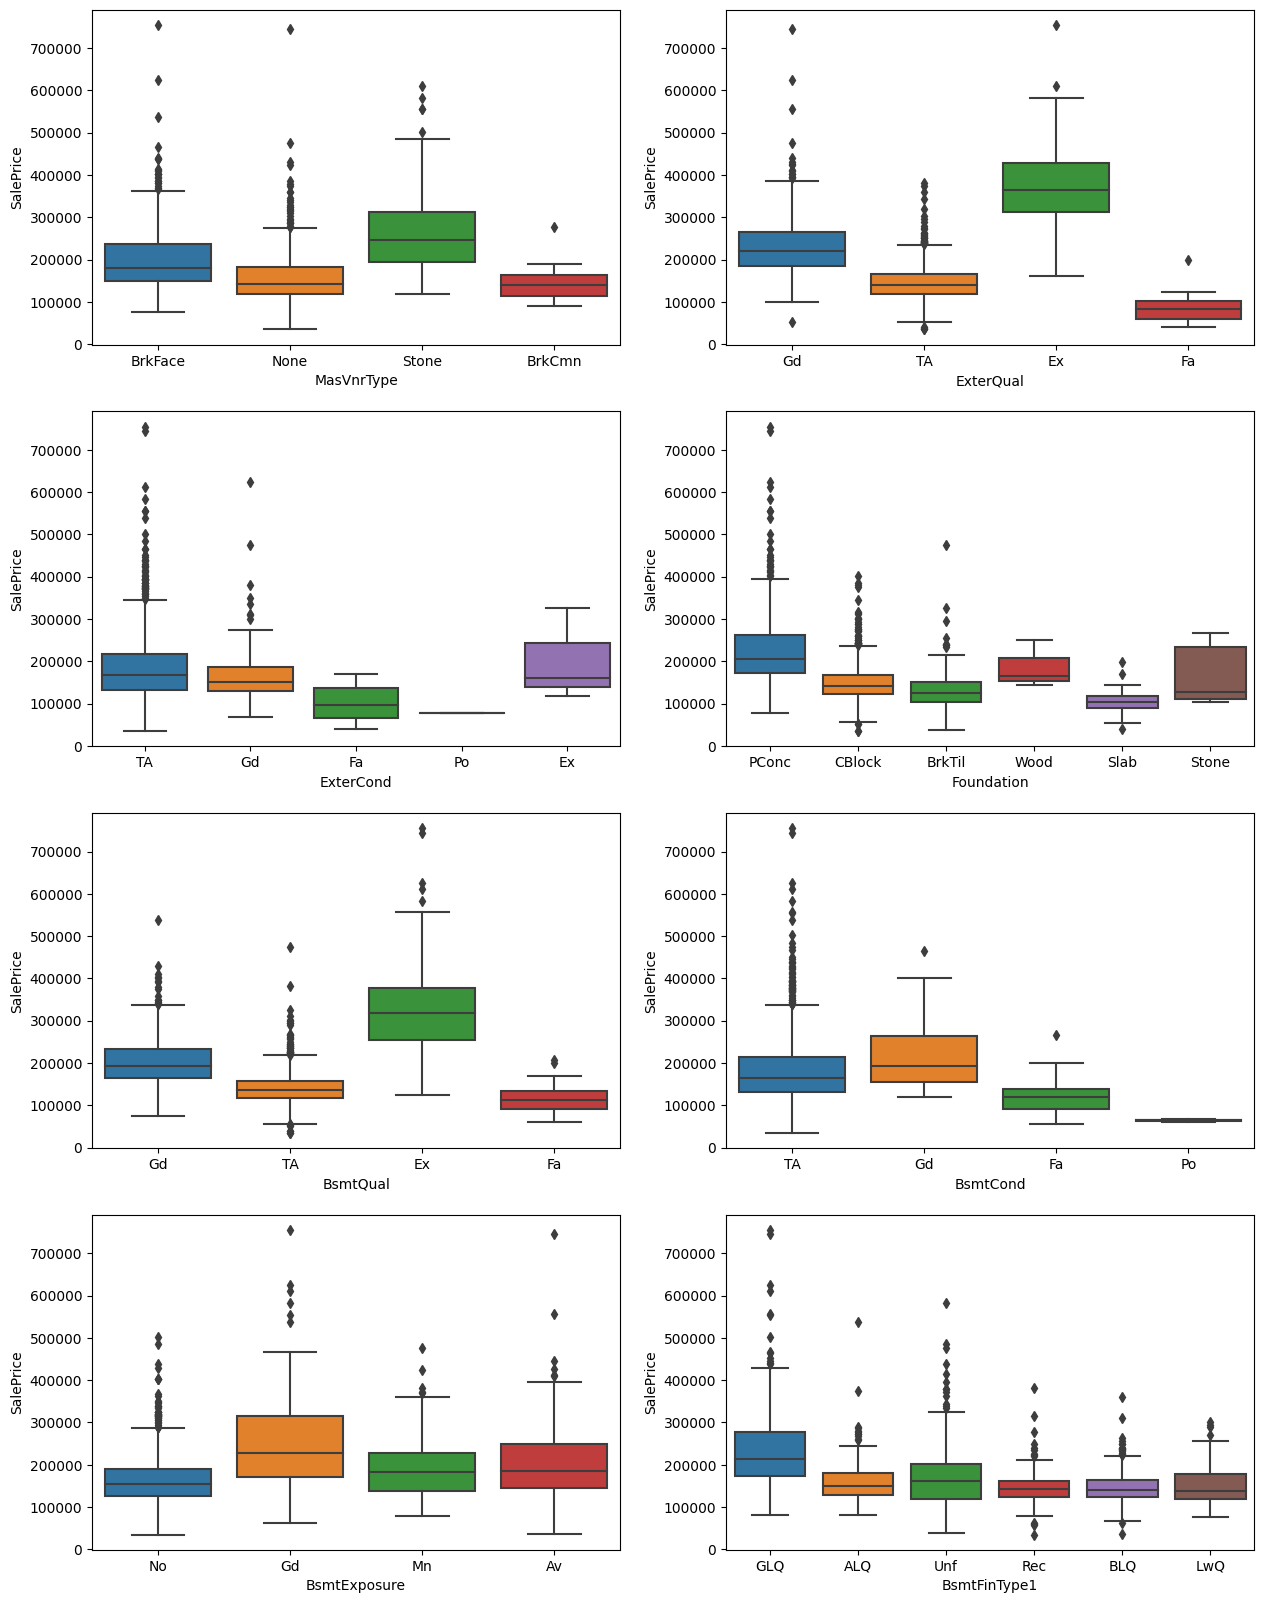

In [24]:
# visualization of categorical variables

plt.figure(figsize=(15,20 ))
plt.subplot(4,2,1)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = shdf)
plt.subplot(4,2,2)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = shdf)
plt.subplot(4,2,3)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = shdf)
plt.subplot(4,2,4)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = shdf)
plt.subplot(4,2,5)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = shdf)
plt.subplot(4,2,6)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = shdf)
plt.subplot(4,2,7)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = shdf)
plt.subplot(4,2,8)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = shdf)
plt.show()

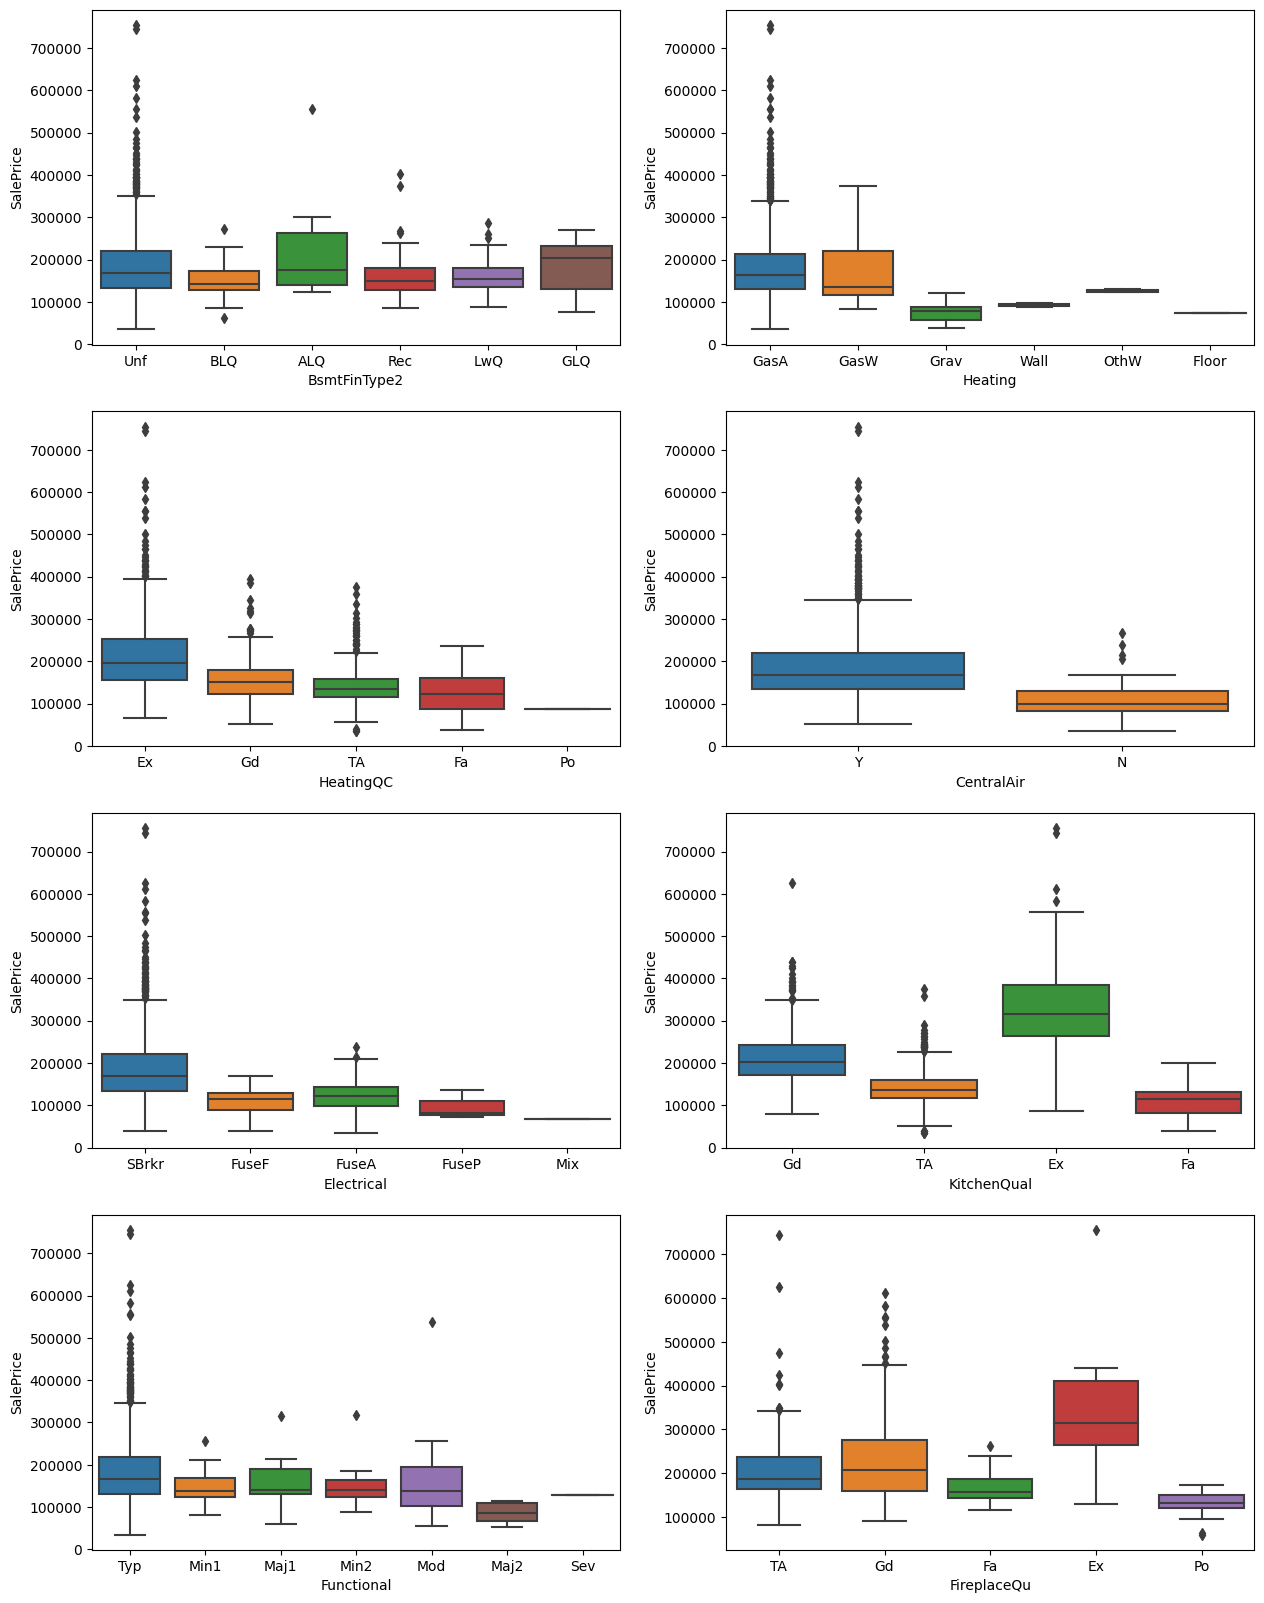

In [25]:
# visualization of categorical variables

plt.figure(figsize=(15,20 ))
plt.subplot(4,2,1)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = shdf)
plt.subplot(4,2,2)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = shdf)
plt.subplot(4,2,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = shdf)
plt.subplot(4,2,4)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = shdf)
plt.subplot(4,2,5)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = shdf)
plt.subplot(4,2,6)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = shdf)
plt.subplot(4,2,7)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = shdf)
plt.subplot(4,2,8)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = shdf)
plt.show()

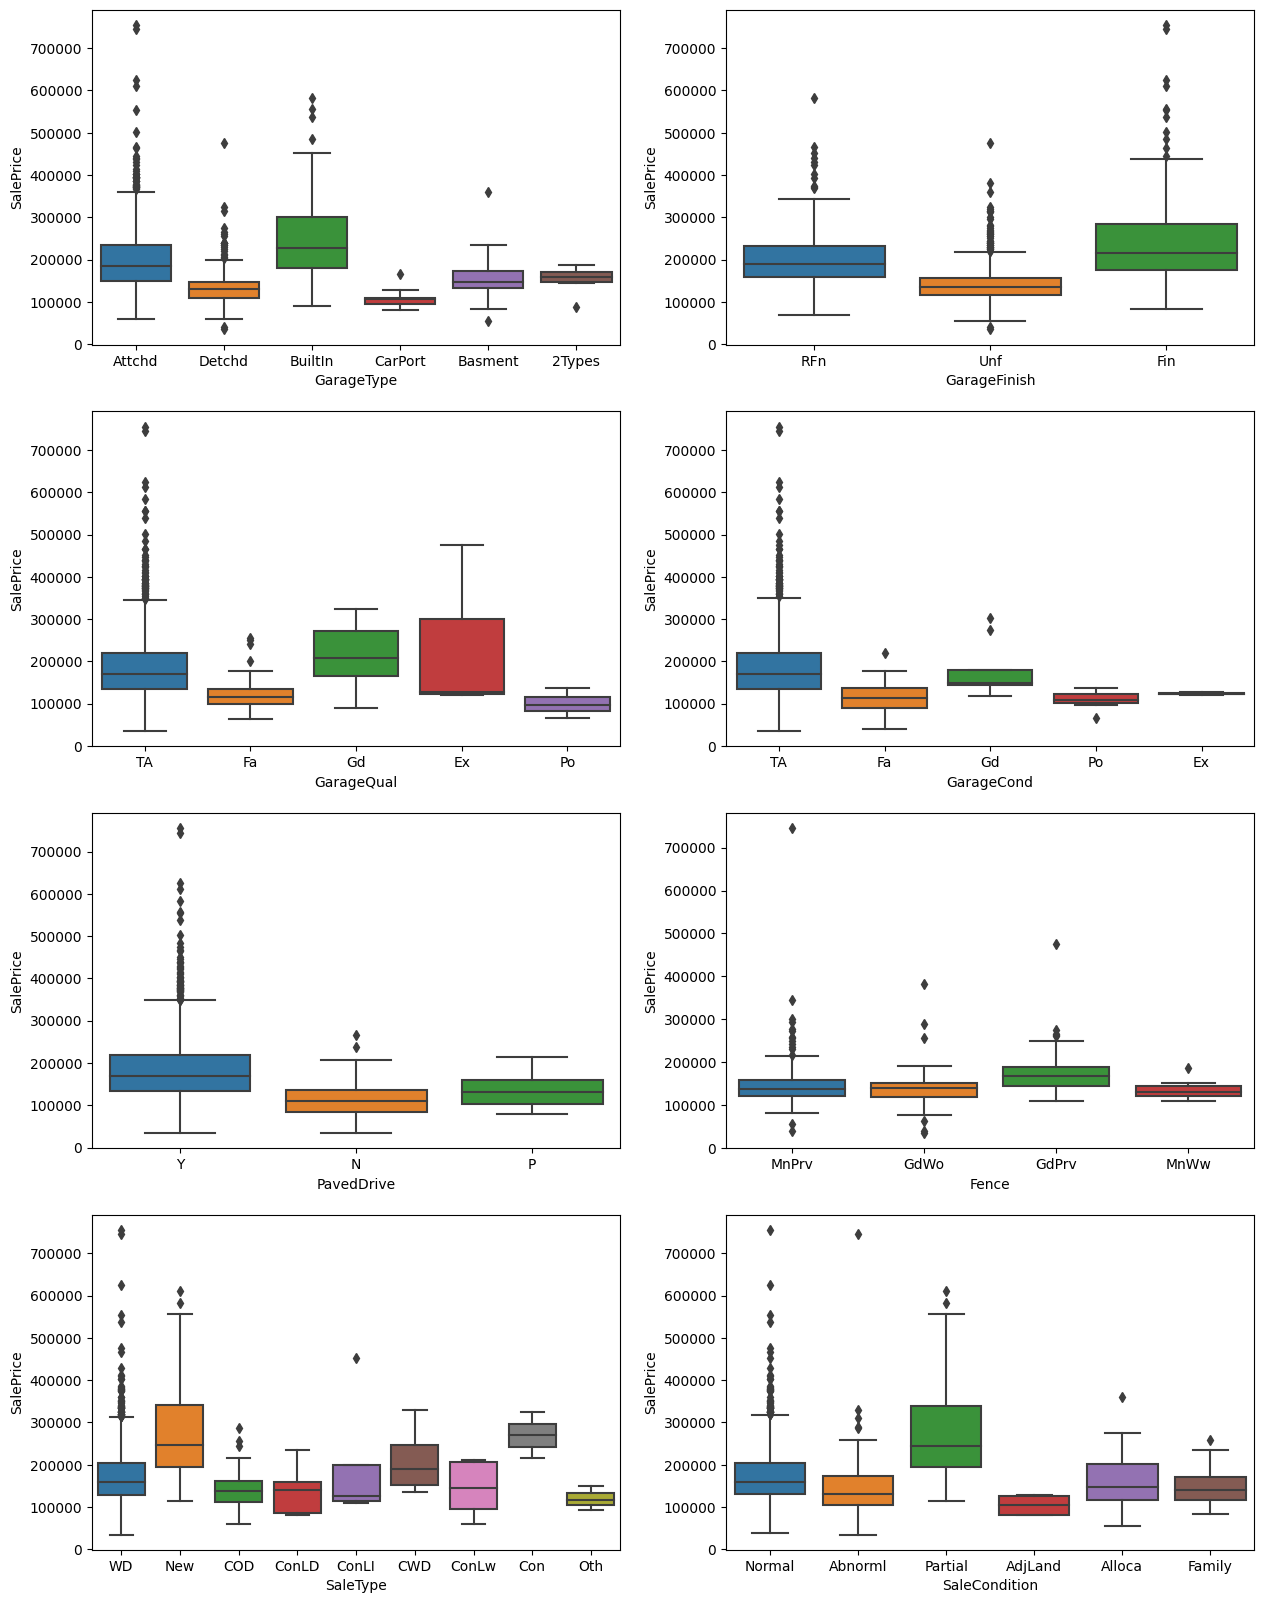

In [26]:
# visualization of categorical variables

plt.figure(figsize=(15,20 ))
plt.subplot(4,2,1)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = shdf)
plt.subplot(4,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = shdf)
plt.subplot(4,2,3)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = shdf)
plt.subplot(4,2,4)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = shdf)
plt.subplot(4,2,5)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = shdf)
plt.subplot(4,2,6)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = shdf)
plt.subplot(4,2,7)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = shdf)
plt.subplot(4,2,8)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = shdf)
plt.show()

### Data Preparation

In [27]:
# split into X and y

In [28]:
X = shdf.loc[:,shdf_cols] # predictors in variable X
y = shdf['SalePrice'] # response variable in Y

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [30]:
#df.drop(['A'], axis=1)
X=X.drop(['SalePrice'],axis=1)

In [31]:
# creating dummy variables for categorical variables

# subset all categorical variables
X_categorical = shdf.select_dtypes(include=['object'])
X_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Functional FireplaceQu GarageType  \
0      CollgCr       Norm       Norm  ...        Typ         NaN     Attchd   
1      Veenker      Feedr       Norm  ...        Typ          TA     Attchd   
2      CollgCr       Norm       Norm  ...        Typ          TA     Attchd   
3      Crawfor       Norm       Norm  ...        Typ          Gd     Detchd   
4      NoRidge       Norm       Norm  ...        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive Fence SaleType SaleCondition  
0          RFn         TA         TA          Y   NaN       WD        Normal  
1          RFn         TA         TA          Y   NaN       WD        Normal  
2          RFn         TA         TA          Y   NaN       WD        Normal  
3          Unf         TA         TA          Y   NaN       WD       Abnorml  
4          RFn         TA         TA          Y   NaN       WD        Normal  

[5 rows x 40 columns]

In [32]:
X_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [33]:
# convert into dummies - one hot encoding
X_dummies = pd.get_dummies(X_categorical, drop_first=True)
X_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 203 columns]

In [34]:
# drop categorical variables 
X = X.drop(list(X_categorical.columns), axis=1)

In [35]:
# concat dummy variables with shdf
X = pd.concat([X, X_dummies], axis=1)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 237 entries, Id to SaleCondition_Partial
dtypes: int64(34), uint8(203)
memory usage: 677.4 KB


In [37]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [38]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
# Scaling the data between 0 and 1
scaler = MinMaxScaler()

xtraincols=X_train.columns
xtestcols=X_test.columns

X_train[xtraincols]=scaler.fit_transform(X_train[xtraincols])
X_test[xtestcols]=scaler.transform(X_test[xtestcols])

In [39]:
X_train.describe()

Id   MSSubClass      LotArea  OverallQual  OverallCond  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.503460     0.226134     0.042143     0.565676     0.572723   
std       0.291287     0.254755     0.048226     0.155529     0.136506   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.252913     0.000000     0.027923     0.444444     0.500000   
50%       0.505826     0.176471     0.037531     0.555556     0.500000   
75%       0.758739     0.294118     0.046943     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  ...   
mean      0.719215      0.582305     0.079337     0.033980     0.241388  ...   
std       0.219897      0.343843     0.082377     0.115907     0.192066  ...   
min       0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%       0.594203      0.283333     0.000000     0.000000     0.092466  ...   
50%       0.731884      0.733333     0.069454     0.000000     0.197774  ...   
75%       0.927536      0.900000     0.126152     0.000000     0.345034  ...   
max       1.000000      1.000000     1.000000     1.000000     1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1021.000000     1021.000000   1021.000000   1021.000000   
mean         0.002938        0.003918      0.078355      0.002938   
std          0.054153        0.062500      0.268860      0.054153   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1021.000000            1021.000000           1021.000000   
mean      0.870715               0.002938              0.007835   
std       0.335680               0.054153              0.088214   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.013712              0.825661               0.078355  
std                0.116350              0.379587               0.268860  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 237 columns]

In [40]:
X_test.describe()

Id  MSSubClass     LotArea  OverallQual  OverallCond  \
count  438.000000  438.000000  438.000000   438.000000   438.000000   
mean     0.491838    0.195810    0.042633     0.568493     0.570205   
std      0.283993    0.233634    0.043013     0.149493     0.145223   
min      0.002742    0.000000   -0.000828     0.000000     0.125000   
25%      0.243489    0.000000    0.029354     0.444444     0.500000   
50%      0.488691    0.176471    0.037005     0.555556     0.500000   
75%      0.722584    0.235294    0.047823     0.666667     0.625000   
max      0.998629    1.000000    0.736888     1.000000     1.000000   

        YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  ...  \
count  438.000000    438.000000  438.000000  438.000000  438.000000  ...   
mean     0.719195      0.577816    0.076725    0.026057    0.246481  ...   
std      0.216762      0.345295    0.077114    0.092662    0.182468  ...   
min      0.021739      0.000000    0.000000    0.000000    0.000000  ...   
25%      0.594203      0.266667    0.000000    0.000000    0.108947  ...   
50%      0.724638      0.716667    0.063873    0.000000    0.214255  ...   
75%      0.934783      0.900000    0.125753    0.000000    0.346533  ...   
max      0.992754      1.000000    0.387668    0.764586    0.828339  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      438.000000      438.000000    438.000000         438.0   
mean         0.004566        0.002283      0.095890           0.0   
std          0.067496        0.047782      0.294778           0.0   
min          0.000000        0.000000      0.000000           0.0   
25%          0.000000        0.000000      0.000000           0.0   
50%          0.000000        0.000000      0.000000           0.0   
75%          0.000000        0.000000      0.000000           0.0   
max          1.000000        1.000000      1.000000           0.0   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   438.000000             438.000000            438.000000   
mean      0.860731               0.002283              0.009132   
std       0.346623               0.047782              0.095235   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            438.000000            438.000000             438.000000  
mean               0.013699              0.808219               0.102740  
std                0.116370              0.394152               0.303966  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 237 columns]

In [41]:
t=X_train.isnull().sum()
for i in t.index:
    if t.get(key = i) > 0:
        print(i + "->" + str(t.get(key = i)))

#t.get(key = 'LotFrontage')


In [42]:
nan_fields=['LotFrontage','MasVnrArea','GarageYrBlt']

### Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [43]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

4361325238976036.5
[ 1.47543755e+03 -1.01021781e+04  1.68669061e+05  5.22134354e+04
  4.45119269e+04  5.09434876e+04  8.31436957e+03 -2.98661724e+17
 -7.79991817e+16 -1.23613357e+17  3.23320896e+17 -2.85468561e+17
 -1.36456615e+17 -3.40315530e+16  3.43883887e+17  1.15912623e+04
 -1.70239341e+03  4.46491795e+03 -3.28502412e+03 -3.37000712e+04
 -2.62150644e+04 -6.25933145e+03  1.36538112e+04  2.35343161e+04
  6.80591113e+02  1.01163516e+04  7.91775229e+03 -2.45435144e+03
  1.71162454e+04  5.28124026e+03  5.01296042e+04  3.01988047e+03
 -2.98500443e+03 -2.62400000e+03  2.30700000e+04  3.06160000e+04
  2.76070000e+04  2.04640000e+04  2.12960000e+04 -2.02800000e+03
 -1.31310000e+04  4.72000000e+02  1.10400000e+04 -8.16400000e+03
  5.64200000e+03 -1.75426875e+04  1.01920000e+04 -8.55200000e+03
 -1.08300000e+04 -5.40000000e+02  2.36800000e+03 -4.49400000e+04
  1.08920000e+04  1.87880000e+04  1.45280000e+04 -5.91200000e+03
  4.98450000e+03  3.30720000e+04 -4.33600000e+03 -4.25600000e+03
  1.28

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

In [46]:


y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

print('-----------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

print('-----------------')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9422177479061986
-3.305572930006625e+21
-----------------
368691146566.0
9.317459837796494e+33
-----------------
361107881.06366307
2.127273935569976e+31


# RFE 

In [47]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 158),
 ('MSSubClass', False, 129),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 39),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 67),
 ('BsmtHalfBath', False, 185),
 ('FullBath', False, 132),
 ('HalfBath', False, 54),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 99),
 ('Fireplaces', False, 112),
 ('GarageCars', True, 1),
 ('GarageArea', False, 28),
 ('WoodDeckSF', False, 77),
 ('OpenPorchSF', False, 57),
 ('EnclosedPorch', False, 161),
 ('3SsnPorch', False, 42),
 ('ScreenPorch', False, 101),
 ('PoolArea', True, 1),
 ('MiscVal', False, 94),
 ('MoSold', False, 143),
 ('YrSold', False, 135),
 ('MSZoning_FV', False, 71),
 ('MSZoning_RH', False, 72),
 ('MSZoning_RL', False, 66)

In [48]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageCars', 'PoolArea', 'Street_Pave', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Condition2_PosN',
       'Condition2_RRAe', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po',
       'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Sev', 'GarageQual_Gd', 'GarageQual_Po', 'GarageCond_Fa',
       'GarageCond_Gd', 'GarageCond_TA', 'SaleType_Con', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [49]:
# Instantiate
lm_rfe = LinearRegression()
# Fit a line
lm_rfe.fit(X_train[rfe_col], y_train)

LinearRegression()

In [50]:
# Print the coefficients and intercept
print(lm_rfe.intercept_)
print(lm_rfe.coef_)

-757633.1110783424
[ 170953.7170148    87119.6885887    59041.82894858   56805.06022208
  157927.95416188   21704.2346015    22571.02294781  159748.49831396
  125540.47848312   82063.55209713  -18248.44640204  134972.74255009
  -35579.61078971  -58872.67378488   37634.51813318   51494.74255361
   28039.06159575  -36474.09835384   23387.16603128   35655.91633994
 -453696.67237808 -100549.10911252   74578.10784973  741881.48234631
  807122.05003141  801825.90587263  742593.97020317  754874.08583993
  726919.37338672  800068.76356279   -5733.28497859  -28130.0855526
   -5733.28497859  -28227.12316812  -35563.25363276  -34864.99261453
   65622.57909815  -38297.05663416  -33589.66995048  -33946.46738763
  -36137.06001308 -106082.89362455   14407.32274727  -21967.44566749
  -15282.55831102  -28901.75125957  -15886.8202371    49453.76383071
    9441.76727589    9441.76727589]


In [51]:

X_train_rfe=X_train[rfe_col]
X_test_rfe=X_test[rfe_col]


y_pred_train_rfe = lm_rfe.predict(X_train_rfe)
y_pred_test_rfe = lm_rfe.predict(X_test_rfe)

metric = []
r2_train_rfe_lr = r2_score(y_train, y_pred_train_rfe)
print(r2_train_rfe_lr)
metric.append(r2_train_rfe_lr)

r2_test_rfe_lr = r2_score(y_test, y_pred_test_rfe)
print(r2_test_rfe_lr)
metric.append(r2_test_rfe_lr)

print('-----------------')

rss1_lr = np.sum(np.square(y_train - y_pred_train_rfe))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_rfe))
print(rss2_lr)
metric.append(rss2_lr)

print('-----------------')

mse_train_rfe_lr = mean_squared_error(y_train, y_pred_train_rfe)
print(mse_train_rfe_lr)
metric.append(mse_train_rfe_lr**0.5)

mse_test_rfe_lr = mean_squared_error(y_test, y_pred_test_rfe)
print(mse_test_rfe_lr)
metric.append(mse_test_rfe_lr**0.5)

0.9198533844923785
0.8073636085204785
-----------------
511391413351.6307
542986610464.79663
-----------------
500873078.6989527
1239695457.682184


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [52]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [54]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
#alpha = 6.0
alpha = 12
#ridge = Ridge(alpha=6.0)
ridge = Ridge(alpha=12)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.68449430e+03 -1.80575392e+04  1.17138608e+04  4.94694857e+04
  1.54578264e+04  3.96032384e+03  1.28534558e+04  1.25990602e+04
  7.92267904e+03  1.66200469e+04  1.99036913e+04  3.00097678e+04
  4.02937800e+04 -2.32286214e+03  4.06711335e+04  1.84040577e+04
  1.44786739e+03  2.81701243e+04  1.09492285e+04  7.35354746e+03
 -8.02811471e+03  2.85754080e+04  2.13402757e+04  2.81081632e+04
  2.07250285e+04  1.39416115e+04  3.76534510e+03  2.14488105e+03
  5.35548247e+03  5.17799137e+03  3.72995956e+03 -7.06564135e+02
 -1.11844733e+03 -3.91453364e+03  4.43655295e+03  3.61880273e+03
  6.54015922e+03  3.35136600e+02  3.00630417e+03  2.71281690e+03
 -7.07621538e+03 -1.09061746e+03  9.48842255e+03  7.79790261e+03
  1.12385130e+04 -2.32702328e+03  1.01832075e+04 -1.01369222e+04
 -2.51466720e+03 -2.49627188e+03  5.91360145e+03  2.95540203e+03
 -7.48667552e+02 -7.20695956e+02 -2.17039402e+03  1.16262130e+03
 -7.81731376e+03  1.84382329e+04 -1.89853985e+04 -1.24156199e+04
 -8.86195899e+03 -4.82466

In [74]:
rc=ridge.coef_
arr = np.array(rc)
arr2 = np.max(arr)
arr2

49469.48567905284

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8767871365387543
0.8588581382151828
786184169967.3022
397838334369.83716
770013878.5184156
908306699.474514


## Lasso

In [56]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [58]:
##### Fitting Laso model for alpha = 100 and printing coefficients which have been penalised

#alpha =20
alpha =40

#lasso = Lasso(alpha=20)
lasso = Lasso(alpha=40)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=40)

In [59]:
Lasso(alpha=20)

Lasso(alpha=20)

In [68]:
lasso.coef_

array([-1.29078161e+03, -2.20476687e+04,  4.56638613e+04,  8.43255716e+04,
        3.13993081e+04,  1.50388659e+04,  7.84078496e+03,  0.00000000e+00,
        7.31652636e+03,  1.19752384e+03,  3.06795445e+04,  0.00000000e+00,
        4.08922890e+04, -1.47011616e+04,  2.46784574e+05,  2.44568040e+04,
        2.11167515e+03,  1.78988041e+04,  0.00000000e+00, -3.08983590e+03,
       -2.33043663e+04,  0.00000000e+00,  8.63746842e+03,  4.19305173e+04,
       -0.00000000e+00,  7.76017783e+03,  1.57143890e+02,  0.00000000e+00,
        6.17367071e+03,  5.67283495e+03, -0.00000000e+00, -0.00000000e+00,
       -1.34215727e+03, -2.82767845e+03,  0.00000000e+00,  7.97872491e+02,
        3.93578748e+03,  0.00000000e+00,  6.11848186e+03,  3.12937243e+02,
       -2.17334011e+04,  3.99395146e+02,  1.07252322e+04,  1.04088482e+04,
        1.23744061e+04, -0.00000000e+00,  1.28793993e+04, -8.13929414e+03,
       -0.00000000e+00, -3.02404775e+02,  2.16337452e+03,  1.14578691e+04,
       -0.00000000e+00,  

In [69]:
lc=lasso.coef_

In [73]:
arr = np.array(lc)
arr2 = np.max(arr)
arr2

246784.57430304185

In [61]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

print("--------------------------")

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

print("--------------------------")

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.912246658182735
0.8512153096257837
--------------------------
559927642783.5236
419381271082.0961
--------------------------
548411011.5411593
957491486.488804


In [62]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.198534e-01      8.767871e-01      9.122467e-01
1   R2 Score (Test)       8.073636e-01      8.588581e-01      8.512153e-01
2       RSS (Train)       5.113914e+11      7.861842e+11      5.599276e+11
3        RSS (Test)       5.429866e+11      3.978383e+11      4.193813e+11
4       MSE (Train)       2.238019e+04      2.774912e+04      2.341818e+04
5        MSE (Test)       3.520931e+04      3.013813e+04      3.094336e+04

## Lets observe the changes in the coefficients after regularization

In [63]:
betas = pd.DataFrame(index=X.columns)

In [64]:
betas.rows = X.columns

In [65]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [66]:
pd.set_option('display.max_rows', None)
betas.head(300)

Linear         Ridge          Lasso
Id                     1.475438e+03  -2684.494300   -1290.781609
MSSubClass            -1.010218e+04 -18057.539187  -22047.668668
LotArea                1.686691e+05  11713.860752   45663.861332
OverallQual            5.221344e+04  49469.485679   84325.571648
OverallCond            4.451193e+04  15457.826431   31399.308081
YearBuilt              5.094349e+04   3960.323838   15038.865852
YearRemodAdd           8.314370e+03  12853.455799    7840.784964
BsmtFinSF1            -2.986617e+17  12599.060174       0.000000
BsmtFinSF2            -7.799918e+16   7922.679040    7316.526360
BsmtUnfSF             -1.236134e+17  16620.046915    1197.523843
TotalBsmtSF            3.233209e+17  19903.691345   30679.544492
1stFlrSF              -2.854686e+17  30009.767795       0.000000
2ndFlrSF              -1.364566e+17  40293.779959   40892.288957
LowQualFinSF          -3.403155e+16  -2322.862135  -14701.161599
GrLivArea              3.438839e+17  40671.133453  246784.574303
BsmtFullBath           1.159126e+04  18404.057720   24456.803964
BsmtHalfBath          -1.702393e+03   1447.867391    2111.675150
FullBath               4.464918e+03  28170.124305   17898.804112
HalfBath              -3.285024e+03  10949.228460       0.000000
BedroomAbvGr          -3.370007e+04   7353.547464   -3089.835903
KitchenAbvGr          -2.621506e+04  -8028.114713  -23304.366320
TotRmsAbvGrd          -6.259331e+03  28575.407987       0.000000
Fireplaces             1.365381e+04  21340.275652    8637.468419
GarageCars             2.353432e+04  28108.163217   41930.517329
GarageArea             6.805911e+02  20725.028517      -0.000000
WoodDeckSF             1.011635e+04  13941.611452    7760.177826
OpenPorchSF            7.917752e+03   3765.345100     157.143890
EnclosedPorch         -2.454351e+03   2144.881047       0.000000
3SsnPorch              1.711625e+04   5355.482473    6173.670706
ScreenPorch            5.281240e+03   5177.991375    5672.834949
PoolArea               5.012960e+04   3729.959561      -0.000000
MiscVal                3.019880e+03   -706.564135      -0.000000
MoSold                -2.985004e+03  -1118.447334   -1342.157269
YrSold                -2.624000e+03  -3914.533643   -2827.678454
MSZoning_FV            2.307000e+04   4436.552946       0.000000
MSZoning_RH            3.061600e+04   3618.802726     797.872491
MSZoning_RL            2.760700e+04   6540.159216    3935.787485
MSZoning_RM            2.046400e+04    335.136600       0.000000
Street_Pave            2.129600e+04   3006.304170    6118.481857
LotShape_IR2          -2.028000e+03   2712.816898     312.937243
LotShape_IR3          -1.313100e+04  -7076.215383  -21733.401076
LotShape_Reg           4.720000e+02  -1090.617463     399.395146
LandContour_HLS        1.104000e+04   9488.422549   10725.232151
LandContour_Low       -8.164000e+03   7797.902610   10408.848188
LandContour_Lvl        5.642000e+03  11238.512970   12374.406095
Utilities_NoSeWa      -1.754269e+04  -2327.023280      -0.000000
LotConfig_CulDSac      1.019200e+04  10183.207484   12879.399253
LotConfig_FR2         -8.552000e+03 -10136.922205   -8139.294140
LotConfig_FR3         -1.083000e+04  -2514.667203      -0.000000
LotConfig_Inside      -5.400000e+02  -2496.271877    -302.404775
LandSlope_Mod          2.368000e+03   5913.601453    2163.374516
LandSlope_Sev         -4.494000e+04   2955.402027   11457.869071
Neighborhood_Blueste   1.089200e+04   -748.667552      -0.000000
Neighborhood_BrDale    1.878800e+04   -720.695956    1617.432043
Neighborhood_BrkSide   1.452800e+04  -2170.394018      -0.000000
Neighborhood_ClearCr  -5.912000e+03   1162.621300    4542.015247
Neighborhood_CollgCr   4.984500e+03  -7817.313762      73.560164
Neighborhood_Crawfor   3.307200e+04  18438.232937   24403.235975
Neighborhood_Edwards  -4.336000e+03 -18985.398541  -14641.241035
Neighborhood_Gilbert  -4.256000e+03 -12415.619885    -809.374298
Neighborhood_IDOTRR    1.286000e+04  -8861.958986   -5161.025044

# 5 fields to drop for assignment

In [76]:
# Fields which are mostly Null values 
assignmenDropFields = ['GrLivArea','RoofMatl_WdShngl','OverallQual','RoofMatl_CompShg','RoofMatl_WdShake']
# shdf=shdf.drop(sfNullFields, axis=1)
X_train=X_train.drop(assignmenDropFields, axis=1)
X_test=X_test.drop(assignmenDropFields, axis=1)


In [95]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 1436 to 266
Columns: 232 entries, Id to SaleCondition_Partial
dtypes: float64(232)
memory usage: 797.3 KB


In [77]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [79]:
##### Fitting Laso model for alpha = 100 and printing coefficients which have been penalised

alpha =100
lasso = Lasso(alpha=100)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [96]:
len(lasso.coef_)

232

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

print("--------------------------")

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

print("--------------------------")

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8899990214318136
0.8477137621118125
--------------------------
701883111891.3293
429251126935.3438
--------------------------
687446730.5497838
980025403.9619721


In [82]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.198534e-01      8.767871e-01      8.899990e-01
1   R2 Score (Test)       8.073636e-01      8.588581e-01      8.477138e-01
2       RSS (Train)       5.113914e+11      7.861842e+11      7.018831e+11
3        RSS (Test)       5.429866e+11      3.978383e+11      4.292511e+11
4       MSE (Train)       2.238019e+04      2.774912e+04      2.621921e+04
5        MSE (Test)       3.520931e+04      3.013813e+04      3.130536e+04

## Lets observe the changes in the coefficients after regularization

In [103]:
betas1 = pd.DataFrame(index=X_test.columns)

In [104]:
betas1.rows = X_test.columns

In [105]:
#betas['Linear'] = lm.coef_
#betas['Ridge'] = ridge.coef_
betas1['Lasso'] = lasso.coef_

In [107]:
pd.set_option('display.max_rows', None)
betas1.head(300)

Lasso
Id                      -3392.416398
MSSubClass             -27020.023479
LotArea                 23067.454928
OverallCond             31194.586649
YearBuilt               18150.027927
YearRemodAdd            10445.140009
BsmtFinSF1                  0.000000
BsmtFinSF2                  0.000000
BsmtUnfSF                7755.172773
TotalBsmtSF             23145.529386
1stFlrSF               213617.695755
2ndFlrSF               133944.826401
LowQualFinSF                0.000000
BsmtFullBath            23633.072835
BsmtHalfBath                0.000000
FullBath                20257.189887
HalfBath                  527.568891
BedroomAbvGr               -0.000000
KitchenAbvGr           -21763.570035
TotRmsAbvGrd                0.000000
Fireplaces              13903.384752
GarageCars              46714.093374
GarageArea                  0.000000
WoodDeckSF              10888.004140
OpenPorchSF                 0.000000
EnclosedPorch               0.000000
3SsnPorch                   0.000000
ScreenPorch              3515.635392
PoolArea                   -0.000000
MiscVal                     0.000000
MoSold                     -0.000000
YrSold                  -2486.513541
MSZoning_FV                 0.000000
MSZoning_RH                 0.000000
MSZoning_RL              4562.898589
MSZoning_RM                -0.000000
Street_Pave                 0.000000
LotShape_IR2                0.000000
LotShape_IR3           -15603.659488
LotShape_Reg                0.000000
LandContour_HLS         10140.392574
LandContour_Low         11564.938073
LandContour_Lvl         10187.529408
Utilities_NoSeWa           -0.000000
LotConfig_CulDSac       10466.584044
LotConfig_FR2           -6101.763050
LotConfig_FR3              -0.000000
LotConfig_Inside           -0.000000
LandSlope_Mod               0.000000
LandSlope_Sev               0.000000
Neighborhood_Blueste       -0.000000
Neighborhood_BrDale         0.000000
Neighborhood_BrkSide       -0.000000
Neighborhood_ClearCr        0.000000
Neighborhood_CollgCr        0.000000
Neighborhood_Crawfor    24536.006262
Neighborhood_Edwards   -19317.728763
Neighborhood_Gilbert    -1794.549510
Neighborhood_IDOTRR     -6202.623347
Neighborhood_MeadowV       -0.000000
Neighborhood_Mitchel   -10942.500359
Neighborhood_NAmes      -7745.136276
Neighborhood_NPkVill        0.000000
Neighborhood_NWAmes        -0.000000
Neighborhood_NoRidge    52794.453523
Neighborhood_NridgHt    32862.582653
Neighborhood_OldTown    -7875.588959
Neighborhood_SWISU          0.000000
Neighborhood_Sawyer     -7036.063144
Neighborhood_SawyerW        0.000000
Neighborhood_Somerst    25520.621615
Neighborhood_StoneBr    31841.235815
Neighborhood_Timber         0.000000
Neighborhood_Veenker    10067.282340
Condition1_Feedr        -5954.822915
Condition1_Norm          9860.993160
Condition1_PosA             0.000000
Condition1_PosN            -0.000000
Condition1_RRAe         -1269.686353
Condition1_RRAn          2245.564517
Condition1_RRNe            -0.000000
Condition1_RRNn            -0.000000
Condition2_Feedr            0.000000
Condition2_Norm             0.000000
Condition2_PosA             0.000000
Condition2_PosN       -188757.514510
Condition2_RRAe            -0.000000
Condition2_RRAn            -0.000000
Condition2_RRNn             0.000000
BldgType_2fmCon             0.000000
BldgType_Duplex         -5842.447843
BldgType_Twnhs          -2919.890879
BldgType_TwnhsE          -634.816921
HouseStyle_1.5Unf        3556.470260
HouseStyle_1Story        3455.650068
HouseStyle_2.5Fin          -0.000000
HouseStyle_2.5Unf          -0.000000
HouseStyle_2Story       -7515.572597
HouseStyle_SFoyer           0.000000
HouseStyle_SLvl            -0.000000
RoofStyle_Gable         -2450.517629
RoofStyle_Gambrel          -0.000000
RoofStyle_Hip               0.000000
RoofStyle_Mansard           0.000000
RoofStyle_Shed              0.000000
RoofMatl_Membran            0.000000
RoofMatl_Metal             -0.000000
RoofMatl_Roll               0.00000